# <font color = "slateblue"> Jobandtalent Forecasting Task - Estimated Gross </font>

<font color = "slateblue"> **Date: 02nd, Dec 2021**

**Name: Pedro Geirinhas**

**email: pegeirinhas@gmail.com**</font>

This Notebook consists of an analysis of Jobandtalent's (JT) artificially modified data sample about a set of contracts.
It's main goal is generate a Machine Learning model that predicts of Gross Salary with gigher accuracy than the current model.

The Notebook is divided into 3 main parts:
 - [Description of Libraries used and respective installation guides](#Import-Libraries-and-Data).
 - [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis):
   - [Data Quality checks and Data Cleaning to the Dataset.](#Datetime-Data-Check)  
   - [Exploration of the Dataset to answer specific questions from JT.](#Answers-to-JT-Specific-Questions)
   - [Final conclusion's and inisghts](#Final-Observations) derive insights that will allow to generate a better prediction model.
 - [A Machine Learning model](#Machine-Learning-Model:-Forecast-of-Total-Gross) that predicts of Gross Salary paid by JT to the worker at the end of his/her working period.

# Import Libraries and Data

In [1]:
# Base Libraries ----------------------------------------------------
import pandas as pd
import numpy as np

# Visualization Libraries -------------------------------------------
#from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

# SKLearn ------------------------------------------------------------
from sklearn.model_selection import train_test_split # split train & testing sets preprocessing package
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Feature Importance & Explainability -------------------------------
import shap

Packages & Libraries website links with installation guides:
 - **Base Packages:** [Pandas](https://pandas.pydata.org/docs/getting_started/index.html), [Numpy](https://numpy.org/doc/)
 - **Visualization Packages:** [Plotnine](https://plotnine.readthedocs.io/en/stable/installation.html), [Seaborn](https://seaborn.pydata.org/installing.html)
 - **Model & Evaluation Packages:** [Scikit-learn](https://scikit-learn.org/stable/install.html), [Shap](https://shap.readthedocs.io/en/latest/index.html)

In [2]:
# Import Dataset
df = pd.read_csv("C:/Users/pgeir/Desktop/Careers/Jobandtalent/Estimated_Gross_Forecasting/ml-faker_random_sample-contracts.csv")
#df = pd.read_csv("ml-faker_random_sample-contracts.csv")
contracts_df = df.copy()

NameError: name 'pd' is not defined

# Exploratory Data Analysis

## Dataset Overview

This sub-section's goal is to get acquainted with the Dataset:
 - Check the Number of rows and columns.
 - Understand the type of data and convert them to their respective data types.
 - Check features with missing values.
 - Remove irrelevant features.

In [3]:
# Check for the Dataframe number of Rows and Columns
contracts_df.shape

(20000, 31)

In [4]:
# Since the Dataframe has 30 columns, increase the display settings throughout analysis
pd.options.display.max_columns = 50

In [5]:
contracts_df.head()

,hiring_id,wp_id,hiring_status,wp_status,business_model,company_id,company_name,hiring_created_at,wp_created_at,hiring_starts_on,hiring_ends_on,wp_starts_on,wp_ends_on,job_function,job_country,candidate_id,candidate_name,total_gross,est_total_gross,currency,issue_reported,contract_type,gross_wage_amount,gross_wage_time_unit,gross_wage_currency_id,work_period_unit,work_period_amount,work_period_hours,fee_percentage,cancellation_date,is_outsourced
0,166037,1723992,ready_to_work,upcoming,staffing_agency,299204747,Hurst-Garcia,2017-01-12 15:57:41.000000,2017-09-13 09:01:22.000000,2017-01-16,2021-01-15,2020-04-01,2020-04-30,support-guy,ES,49285305,Kenneth Price,1114.285714,1114.285714,EUR,False,full_time,650,hour,EUR,month,2.0,40.0,3.92,NaN,NaN
1,569936,7254150,hiring_closed_out,paid,staffing_agency,237165491,Reese and Sons,2017-02-27 10:27:24.000000,2017-03-19 13:50:52.000000,2017-02-27,2017-05-28,2017-03-20,2017-03-26,noise-guy,GB,57619821,Susan Santos,346.970000,364.877990,GBP,False,by_hours,750,hour,GBP,week,12.0,40.0,10.09,NaN,NaN
2,352139,4706480,hiring_closed_out,paid,staffing_agency,168767792,Peterson-Wilson,2017-01-10 17:02:04.000000,2017-01-10 17:23:14.000000,2017-01-10,2018-01-09,2017-10-01,2017-10-31,f1-guy,ES,57564699,Susan Jensen,1061.660000,1041.660000,EUR,False,full_time,104166,month,EUR,month,12.0,40.0,5.00,NaN,NaN
3,313527,5362133,hiring_closed_out,paid,independent_contractor,211514331,Eaton LLC,2017-09-07 15:10:16.000000,2018-02-01 16:15:30.000000,2017-09-04,2018-03-18,2018-01-29,2018-02-04,drop-guy,GB,57795686,Michael Day,455.000000,390.840322,GBP,True,full_time,800,hour,GBP,week,12.0,40.0,9.00,NaN,NaN
4,425850,5002046,hiring_closed_out,paid,staffing_agency,146877029,Adams LLC,2017-07-04 08:33:55.000000,2017-07-10 14:50:53.000000,2017-07-10,2017-08-28,2017-08-01,2017-08-28,f1-guy,ES,52752416,Christie Keller,664.280000,1031.968000,EUR,False,full_time,110568,month,EUR,month,1.6,40.0,0.00,NaN,NaN


From a first inspection, we can see that there are **3 types of Features**:
    
   - **Numerical:** These are continious and discrete e.g.: `total_gross` (target variable), `est_total_gross` (predicted target variable), `gross_wage_amount` (salary per work period),`fee_percentage` (revenue source of JT), `work_period_ammount` (dificult to establish actual meaning), `work_period_hours` (hours within a work period, eg: 40 hours per week, 8 hours per day, etc). 
   - **Dates:** 2 features show long date format (date & hours) and 3 other are formated as date only
   - **Categoricals:** all features ending with `_id`, `_status`, `_model`, `_name`, `_type` and `_unit`
   
  

In order to treat data accordingly and optimize memory space, all features should be converted to their corresponding `d_types`.

In [6]:
contracts_df = contracts_df.convert_dtypes()

In [7]:
# columns containing dates will have to be converted manually, otherwise pandas will convert them to strings

date_cols_list = contracts_df.loc[:,contracts_df.columns.str.contains("_on")
                                  | contracts_df.columns.str.contains("_at")
                                  | contracts_df.columns.str.contains("_date")].columns.to_list()

for column_name in date_cols_list: 
    contracts_df[column_name] = pd.to_datetime(contracts_df[column_name], 'coerce')

**Note:** an error was raised while parsing columns to datetime, this is an indication of porr data quality that needs to be further explored.

In [8]:
# Convert columns containing keyword id to string
contracts_df.loc[:,contracts_df.columns.str.contains("_id")] = contracts_df.loc[:,contracts_df.columns.str.contains("_id")].astype("string")

In [9]:
# Check that all Features have been converted and spot missing values
contracts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   hiring_id               20000 non-null  string        
 1   wp_id                   20000 non-null  string        
 2   hiring_status           20000 non-null  string        
 3   wp_status               20000 non-null  string        
 4   business_model          20000 non-null  string        
 5   company_id              20000 non-null  string        
 6   company_name            20000 non-null  string        
 7   hiring_created_at       20000 non-null  datetime64[ns]
 8   wp_created_at           20000 non-null  datetime64[ns]
 9   hiring_starts_on        20000 non-null  datetime64[ns]
 10  hiring_ends_on          20000 non-null  datetime64[ns]
 11  wp_starts_on            20000 non-null  datetime64[ns]
 12  wp_ends_on              20000 non-null  dateti

From the previous table, we can also observe that `is_outsourced` **only** has missing values (meaning it is irrelevant) and `cancellation_date` has null values.

In [10]:
# Drop feature is_outsourced since it is irrelevant
contracts_df.drop("is_outsourced", axis=1, inplace=True)

In [11]:
missing_value_pct = round(contracts_df.loc[~(contracts_df.cancellation_date.isna()),:].shape[0] / contracts_df.shape[0] * 100)
f"The feature cancellation_date is the only one with missing values that account for {missing_value_pct} percent."

'The feature cancellation_date is the only one with missing values that account for 26 percent.'

This appears to make sense, since contracts can be cancelled due to bad performance or workers leaving to other companies.

## Data Quality Check

This sub-section's goal is to detect Data inconsistencies and make appropriate transformations to the Dataset according to assumptions established.

These transformations will allow to improve the Machine Learning model prediction's of `total_gross`.

This **analysis is conducted** according to the previously identified **3 main types of variables (Numerical, Datetime and Categorical).**

This sub-section is **divided into 2 main parts**:

- A [summary list](#Data-Assumptions-List-Summary) with identified data inconsistencies and assumptions made. (bookmarked to their respective detailled explanation)   
- Detailed expplanations of data inconsistencies and assumptions divided by [Numerical](#Numerical-Data-Check), [Date](#Datetime-Data-Check) and [Categorical features](#Categorical-Data-Check).

### Data Assumptions List Summary<a name='assumptions' />

- **[Salary Feature Assumption:](#Hypotgesis-1:-Inconsistency-&-Outlier-in-gross_wage_amount)** due to a possible wrong input, it is divided by 100 and 10 Outliers are removed. Data is transformed since it may have dependencies in estimating target variable `total_gross`.  
- **[Total Gross Feature Assumption:](#Hypothesis-2:-Outlier-in-total_gross)** due to a possible wrong input, approximately 10 outliers are found and removed for data consistency and better predictions.
- **[Positive Numerical Values Assumption:](#Numerical-Data-Check)** due to a possible wrong input, negative numerical values in `total_gross`, `est_total_gross` and `work_period_amount` features are transformed to positive.
- **[Outliers in `Cancelation_Date`:](#Exploration-of-Cancelation-dates)** Values before 2016 are considered outliers and removed . 
- **[New Variable `cancel_days` created:](#Exploration-of-Cancelation-dates)** This variable is created since it can help further exploring the Dataset and answer questions. Cancellation is assumed to be calculated as `cancelation_date` - `hiring_starts_on`. 
- **[New Variable `wp_days` created:](#Creation-on-a-New-Variable-That-Measures-Work-Period-Number-of-Days)** This variable is created since it is estimated that will share a close relationship with Total Gross and will therefore be important for the Model Prediction.
- **[Date Range Outliers:](#Data-Range-Outliers)** Certain Date Ranges fall outside the relevant periods, these are removed.   
- **[Important Date Assumption:](#Data-Range-Outliers)** Work Periods are paid at the end of each period, therefore `wp_ends_on` variable should be considered for the Model.
    
**Note:** for further information click the bookmark on each assumption/data inconsistency

### Numerical Data Check

A glance over descriptive statistics for numerical features allows to derive initial insights.

In [12]:
# Show descriptive statistics of numerical features to look for more insights or discrepencies
contracts_df.describe(exclude=("string","datetime", "boolean"))

,total_gross,est_total_gross,gross_wage_amount,work_period_amount,work_period_hours,fee_percentage
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,756.938708,888.690102,60285.920250,10.617265,34.967625,6.144847
std,835.168528,2351.382327,69063.749557,10.231662,10.193625,3.720692
min,-383.500000,-549.980357,500.000000,-9.200000,1.000000,0.000000
25%,309.797500,390.840322,800.000000,3.000000,35.000000,2.810000
50%,618.250000,513.333333,1092.000000,12.000000,40.000000,6.000000
75%,1143.050000,1127.000000,116950.000000,12.000000,40.000000,9.000000
max,36322.707810,37880.447730,500000.000000,72.900000,60.000000,43.300000


At first glance, certain **<font color = "darkred">"Red Flags"** can be spotted:

 1. The mean of Actual `total_gross`and Estimated `est_total_gross` are lower than the `gross_wage_amount` and `work_period_amount`.
     - An hypthosis is drawn that `gross_wage_ammount` might have wrong data inputs due to its high Standard Deviation.


 2. The mean and standard deviation of `total_gross` in comparison to its highest value point out to the presence of Outliers.
     - An hyptothesis is drawn there may be wrong input data. 


 3. `total_gross`, `est_total_gross` and `work_period_amount` have negative minimum values.
     - An hyptothesis is drawn there may be wrong input data, since workers should not owe salary and hours to the employer.


 4. `fee_percentage` appears to have some outliers, since its max value is significantly high in respect to mean and 75 percentile.

Further analysis is required to go over innitial hypothesis.

#### Hypotgesis 1: Inconsistency & Outlier in `gross_wage_amount`

In [13]:
# Group wage_ammount by their unit to see if we can spot any inconsistencies
wage_df = contracts_df.loc[:, ["total_gross", "est_total_gross", "gross_wage_amount",\
                               "gross_wage_time_unit", "work_period_amount", "work_period_hours"]]

wage_df.groupby(by="gross_wage_time_unit", as_index=True).mean().sort_values(by="gross_wage_amount", ascending=False)

,total_gross,est_total_gross,gross_wage_amount,work_period_amount,work_period_hours
gross_wage_time_unit,,,,,
month,1052.009528,1014.945539,128937.040286,12.050706,37.085608
week,2906.543612,34024.968846,65574.860215,12.0,40.0
hour,482.920419,490.721711,844.684063,9.365041,33.091352


The data inconsistency seems to be that `gross_wage_amount` needs to be divided by 100, since those values would be more representative of monthly, weekly and hourly wages. This statement can also be reeinforced by looking at a monthly or work period with 30 days, or hourly work period and contrasting it with the currently estimated total gross.

While this should be checked with a relevant department since it may impact have dependencies from other variables, for this analysis **an assumption is made that values should be corrected**.

In [14]:
# Convert gross_wage_amount according to hypothesis 
contracts_df["gross_wage_amount"] = contracts_df.loc[:, "gross_wage_amount"] / 100

Furthermore, the descriptive statistics pointed out for the presence of Outliers.

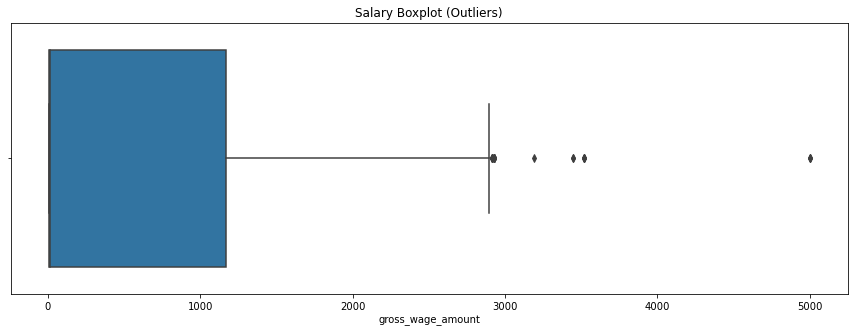

In [15]:
# Inspect this hypothesis by ploting a Boxplot
fig = plt.figure(figsize=(15, 5))
sns.boxplot(data=contracts_df, x="gross_wage_amount").set_title("Salary Boxplot (Outliers)")
plt.show()

Since these consist of **only** a few records, it might be an indication of wrong data entry and **an assumption is made that values are Outliers should be corrected**.

In [16]:
contracts_df = contracts_df.loc[contracts_df.gross_wage_amount < 3000,:].copy()

#### Hypothesis 2: Outlier in `total_gross`<a name='gross' />

The descriptive statistics pointed out for the presence of Outliers in this feature.

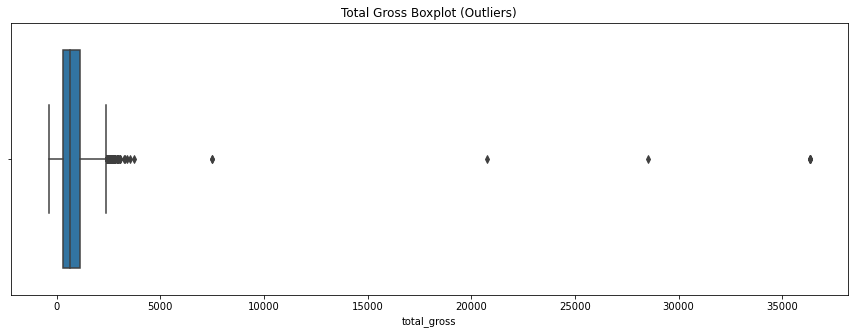

In [17]:
# Inspect this hypothesis by ploting a Boxplot
fig = plt.figure(figsize=(15, 5))
sns.boxplot(data=contracts_df, x="total_gross").set_title("Total Gross Boxplot (Outliers)")
plt.show()

In [18]:
contracts_df.loc[(contracts_df.total_gross > 10000)&(contracts_df.business_model == "independent_contractor")&(contracts_df.company_name=="Griffin, Myers and Jones")\
                 ,["total_gross","business_model","company_name","gross_wage_amount","work_period_hours"]].sort_values(by="gross_wage_amount",ascending=False)

,total_gross,business_model,company_name,gross_wage_amount,work_period_hours
1027,36322.70781,independent_contractor,"Griffin, Myers and Jones",700.0,40.0
5866,36322.70781,independent_contractor,"Griffin, Myers and Jones",700.0,40.0
7812,36322.70781,independent_contractor,"Griffin, Myers and Jones",700.0,40.0
13437,36322.70781,independent_contractor,"Griffin, Myers and Jones",700.0,40.0
19125,36322.70781,independent_contractor,"Griffin, Myers and Jones",700.0,40.0
15761,20745.30861,independent_contractor,"Griffin, Myers and Jones",400.0,40.0


In [19]:
contracts_df.loc[(contracts_df.total_gross < 10000)&(contracts_df.business_model == "independent_contractor")&(contracts_df.company_name=="Griffin, Myers and Jones")\
                 ,["total_gross","business_model","company_name","gross_wage_amount","work_period_hours"]].sort_values(by="gross_wage_amount",ascending=False).head()

,total_gross,business_model,company_name,gross_wage_amount,work_period_hours
4389,0.0,independent_contractor,"Griffin, Myers and Jones",730.0,40.0
2339,700.0,independent_contractor,"Griffin, Myers and Jones",730.0,40.0
13828,730.0,independent_contractor,"Griffin, Myers and Jones",730.0,40.0
13818,680.0,independent_contractor,"Griffin, Myers and Jones",730.0,40.0
16693,730.0,independent_contractor,"Griffin, Myers and Jones",730.0,40.0


The values found, show that they share common patterns such as the same `company_name`, `business_model` and `job_function`. 

Therefore, by filtering for the same values and comparing `total_gross` to other common features such as `gross_wage_amount` and `gross_period_hours`, evidence points out that these consist of Outliers probably due to wrong data entry.

While this should be checked with a relevant department since it may impact have dependencies from other variables, for this analysis **an assumption is made that values should be corrected**.

In [20]:
contracts_df = contracts_df.loc[contracts_df.total_gross < 10000,:].copy()

#### Hypothesis 3: Negative Values for `total_gross`, `est_total_gross` and `work_period_amount`<a name='negative' />

In [21]:
contracts_df.loc[contracts_df.total_gross < 0,:]

,hiring_id,wp_id,hiring_status,wp_status,business_model,company_id,company_name,hiring_created_at,wp_created_at,hiring_starts_on,hiring_ends_on,wp_starts_on,wp_ends_on,job_function,job_country,candidate_id,candidate_name,total_gross,est_total_gross,currency,issue_reported,contract_type,gross_wage_amount,gross_wage_time_unit,gross_wage_currency_id,work_period_unit,work_period_amount,work_period_hours,fee_percentage,cancellation_date
1847,372199,1182775,hiring_cancelled,reviewed,staffing_agency,535314216,Patterson-Alexander,2017-11-21 16:21:00,2017-11-21 17:27:48,2017-11-22,2018-02-21,2017-12-01,2017-12-01,f1-guy,ES,57726663,Ray Jones,-0.01,35.577333,EUR,False,full_time,1067.32,month,EUR,month,3.0,40.0,7.0,2017-12-01
2206,308943,3375756,ready_to_work,payslip_generated,independent_contractor,98246459,Hamilton-Richardson,2017-10-05 09:26:06,2017-11-23 17:24:54,2017-09-11,2017-12-17,2017-11-20,2017-11-26,drop-guy,GB,57501270,Joshua Scott,-296.43,494.68965,GBP,True,full_time,10.0,hour,GBP,week,12.0,40.0,10.0,NaT
5670,679917,4458317,ready_to_work,payslip_generated,independent_contractor,211514331,Eaton LLC,2017-08-31 14:03:35,2017-11-10 21:10:33,2017-08-31,2018-03-18,2017-11-13,2017-11-19,drop-guy,GB,57701480,Stephanie Perry,-142.0,390.840322,GBP,True,full_time,8.0,hour,GBP,week,12.0,40.0,9.0,NaT
14780,314598,5094884,hiring_cancelled,reviewed,staffing_agency,130576639,Burton-Lopez,2017-05-16 16:47:49,2017-08-04 10:49:22,2017-05-18,2018-08-06,2017-09-01,2017-09-05,f1-guy,ES,57651243,Karen Price,-30.81,175.71,EUR,False,full_time,1054.26,month,EUR,month,3.0,40.0,8.0,2017-09-05
14808,373158,6035834,ready_to_work,payslip_generated,independent_contractor,211514331,Smith and Sons,2017-07-20 13:06:47,2017-11-19 15:49:31,2017-07-22,2018-03-25,2017-11-13,2017-11-19,drop-guy,GB,57693741,Todd Williams,-383.5,390.840322,GBP,True,full_time,8.0,hour,GBP,week,12.0,40.0,9.0,NaT
15947,59315,1178152,hiring_cancelled,reviewed,staffing_agency,407236030,Daniel LLC,2017-09-18 09:55:06,2017-09-18 16:58:48,2017-09-19,2017-12-18,2017-10-01,2017-10-02,top-guy,ES,55163145,Jacob Johnson,-9.15,101.892,EUR,False,full_time,1528.38,month,EUR,month,3.0,40.0,7.0,2017-10-02


In [22]:
contracts_df.loc[contracts_df.total_gross < 0,:].shape

(6, 30)

In [23]:
contracts_df.loc[contracts_df.est_total_gross < 0,:]

,hiring_id,wp_id,hiring_status,wp_status,business_model,company_id,company_name,hiring_created_at,wp_created_at,hiring_starts_on,hiring_ends_on,wp_starts_on,wp_ends_on,job_function,job_country,candidate_id,candidate_name,total_gross,est_total_gross,currency,issue_reported,contract_type,gross_wage_amount,gross_wage_time_unit,gross_wage_currency_id,work_period_unit,work_period_amount,work_period_hours,fee_percentage,cancellation_date
1663,854742,2190775,hiring_cancelled,payslip_generated,staffing_agency,240836843,Contreras-Campbell,2016-10-19 17:25:26,2016-10-19 17:57:23,2016-10-20,2017-04-19,2016-11-01,2016-10-20,minister,ES,57510047,Melissa Jackson,5.86,-368.342857,EUR,False,full_time,5.86,hour,EUR,month,6.0,40.0,5.0,2016-10-20
17982,187030,1687548,hiring_cancelled,payslip_generated,staffing_agency,8220959,Michael-Simpson,2016-12-02 15:35:55,2016-12-14 11:26:03,2016-12-02,2016-12-25,2016-12-12,2016-12-02,drop-guy,GB,57039541,Thomas Stephens,224.01,-549.980357,GBP,False,full_time,7.5,hour,GBP,week,53.0,50.0,10.0,2016-12-02


In [24]:
contracts_df.loc[contracts_df.work_period_amount < 0,:]

,hiring_id,wp_id,hiring_status,wp_status,business_model,company_id,company_name,hiring_created_at,wp_created_at,hiring_starts_on,hiring_ends_on,wp_starts_on,wp_ends_on,job_function,job_country,candidate_id,candidate_name,total_gross,est_total_gross,currency,issue_reported,contract_type,gross_wage_amount,gross_wage_time_unit,gross_wage_currency_id,work_period_unit,work_period_amount,work_period_hours,fee_percentage,cancellation_date
10448,870091,3792213,hiring_cancelled,paid,staffing_agency,301725080,Baker and Sons,2017-12-01 11:24:06,2017-12-04 10:13:59,2017-12-05,2018-03-04,2017-12-05,2017-12-31,f1-guy,ES,57848516,Erica Martin,960.59,982.332,EUR,False,full_time,1091.48,month,EUR,month,-9.2,40.0,7.0,2018-01-15
16425,796823,3056624,ready_to_work,paid,staffing_agency,301725080,Baker and Sons,2017-12-01 11:24:04,2017-12-04 08:47:03,2017-12-05,2018-03-04,2017-12-05,2017-12-31,f1-guy,ES,49923498,Brian Harmon,780.59,982.332,EUR,False,full_time,1091.48,month,EUR,month,-9.2,40.0,7.0,NaT


The negative values appear in different indexes and are not related to each feature. 

The only relation they seem to share is that they all have a `cancellation_date`. 

Even though candidates should not owe money to their employers, there could be some cases where this may happen. However, since we do not have a department to further ask questions to, for this analysis an **assumption is made that these values will be considered positive (there are only 10 inputs and the corresponding values appear to make sense)**.

In [25]:
# Replace rows by positive values
contracts_df.loc[contracts_df.total_gross < 0,"total_gross"] = contracts_df.loc[contracts_df.total_gross < 0,"total_gross"] * -1
contracts_df.loc[contracts_df.est_total_gross < 0,"est_total_gross"] = contracts_df.loc[contracts_df.est_total_gross < 0,"est_total_gross"] * -1
contracts_df.loc[contracts_df.work_period_amount < 0,"work_period_amount"] = contracts_df.loc[contracts_df.work_period_amount < 0,"work_period_amount"] * -1

In [26]:
# Check if correctly replaced
(contracts_df.loc[:,["total_gross","est_total_gross","work_period_amount"]] < 0).any() == True

total_gross           False
est_total_gross       False
work_period_amount    False
dtype: bool

#### Hypothesis 4: Outliers in `fee_percentages` Feature<a name='fee' />

Quick outlier analysis to check for data inconsistency. In order to check, the Dataframe is sliced for values that are approximately 2 standard deviations above the `fee_percentage` mean. The data is grouped, since this might provide furthe rinsights.

In [27]:
# Filter with high values percentage values and group Dataframe by company and function
contracts_df.loc[contracts_df.fee_percentage > 15,:].groupby(by=["company_name", "job_function"], as_index=False).mean().sort_values("fee_percentage", ascending=False)

,company_name,job_function,total_gross,est_total_gross,issue_reported,gross_wage_amount,work_period_amount,work_period_hours,fee_percentage
3,"Harmon, Stephens and Ruiz",f1-guy,649.2525,662.890444,0.166667,1012.605,3.25,37.0,39.188555
5,"Lopez, Alexander and Williams",caller,605.044167,551.704762,0.0,6.584167,2.8,40.0,22.1
2,Gonzalez PLC,f1-guy,1117.0,629.17,0.0,1258.34,12.0,40.0,20.0
4,Howard-Clark,f1-guy,353.52,316.278,0.0,1054.26,3.0,40.0,20.0
6,Mcbride-Woods,restaurant-hotel-guy,55.65,35.92,0.0,8.98,4.0,4.0,20.0
7,Norman PLC,drop-guy,57.84,49.0,0.0,7.0,1.0,7.0,20.0
8,"Porter, Romero and Stewart",restaurant-hotel-guy,74.37,72.0,0.0,12.0,6.0,6.0,20.0
9,Smith and Sons,restaurant-hotel-guy,242.5,131.04,0.0,10.92,2.0,6.0,20.0
10,Willis-Black,noise-guy,1188.591667,1188.591667,0.0,1333.0,6.0,40.0,20.0
11,Willis-Black,support-guy,1160.316667,951.703704,0.0,1008.333333,30.666667,40.0,20.0


In [28]:
contracts_df.loc[contracts_df.fee_percentage > 15,["company_name","job_function","fee_percentage","cancellation_date"]]\
.groupby(by=["company_name", "job_function"], as_index=False).count().sort_values("fee_percentage", ascending=False)

,company_name,job_function,fee_percentage,cancellation_date
3,"Harmon, Stephens and Ruiz",f1-guy,12,12
5,"Lopez, Alexander and Williams",caller,12,10
11,Willis-Black,support-guy,9,2
10,Willis-Black,noise-guy,8,0
1,"Conley, Anderson and Henry",top-guy,2,2
6,Mcbride-Woods,restaurant-hotel-guy,2,0
0,"Conley, Anderson and Henry",chef,1,1
2,Gonzalez PLC,f1-guy,1,1
4,Howard-Clark,f1-guy,1,1
7,Norman PLC,drop-guy,1,0


High `fee_percentage` values seems to share the same employers, job functions and certain candidates.

Therefore, albeit being outliers, **this does NOT seem to be a data problem or inconsistency**.

However, certain insights are derived regarding a possible **Relationship subject to later Analysis:**
- Positive relationship between `fee_percentage` and `job_function` as well `company_name` to explore.
- Also, certain companies seem to have more occurences of `cancellation_date` with higher `fee_percentage`. 

### Datetime Data Check

A glance over descriptive statistics for date features allows to derive initial insights.

In [29]:
# Show descriptive statistics of date features to look for more insights or discrepencies
contracts_df.describe(include=("datetime"), datetime_is_numeric=False)

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.


,hiring_created_at,wp_created_at,hiring_starts_on,hiring_ends_on,wp_starts_on,wp_ends_on,cancellation_date
count,19983,19983,19983,19983,19983,19983,5176
unique,9219,14086,536,882,526,755,478
top,2017-07-20 13:03:18,2017-09-13 08:58:16,2017-09-04 00:00:00,2018-03-25 00:00:00,2018-01-01 00:00:00,2017-12-31 00:00:00,2017-11-30 00:00:00
freq,25,22,1285,2296,740,775,382
first,2016-10-14 10:09:00,2016-10-14 14:04:55,2015-02-02 00:00:00,2016-10-22 00:00:00,2016-10-01 00:00:00,2016-10-02 00:00:00,1996-09-13 00:00:00
last,2018-03-20 12:17:37,2018-03-20 14:52:14,2019-10-25 00:00:00,2023-11-16 00:00:00,2023-06-01 00:00:00,2023-06-30 00:00:00,2018-04-04 00:00:00


We can derive a few insights insights from the above table:

1. There are more unique records for Work Periods than Hirings. Considering Work Periods are subsets of Hirings, **an assumption is made that a hiring period consists of a contract between a worker and employer, whilst a work period refers to the number or working hours a worker is required for a specific job for a given period**.


2. The oldest `cancelation_date` goes up to 1996, before te oldest `hiring_created_at`, which points out to Data inconsistency that needs to be explored.

#### Exploration of Cancelation dates<a name='cancel' />

In [30]:
# Sort contracts by cancelation dates
contracts_df.loc[~contracts_df.cancellation_date.isna(),["wp_id","cancellation_date"]].sort_values(by="cancellation_date").head(5)

,wp_id,cancellation_date
9953,4604423,1996-09-13
14928,3825134,1996-09-13
3306,2009507,1996-09-13
16040,830486,2016-09-30
8982,2182415,2016-10-13


We can see there are only 3 cancelation dates before 2016. Since we cannot check with the corresponding department and it is dificult to establish the correct date (median might be misleading), **an assumption is made that these values will be removed considering they only represent 3 records**. 

In [31]:
# Slice Dataframe to remove values before 2016 
contracts_df = contracts_df.loc[(contracts_df.cancellation_date >= "2016-01-01") | (contracts_df.cancellation_date.isna()),:]

# Check number of rows, should be 19987 (20K -3)
contracts_df.shape[0]

19980

In addition, 2 hypothesis are drawn that contract cancelation may be due to 2 factors:
 
 - Contracts have probation periods, which may lead to cancelation (from either company or worker side).
 - Outsourced companies may cancel contracts due to bad performance and reduced compensation packages.
 
In order to further explore these assumptions, it is helpful to compute time diferences of cancelation date vs contract date (`cancelation_date` - `hiring_starts_on`).

**Note:** an assumption is made that `hiring_starts_on` refers to the contract start date (when workers would start earning wage), where as `hiring_created_at` refers to the signing of the contract.

In [32]:
# Create new feature with time difference between cancelation date and contract date
contracts_df["cancel_days"] = (contracts_df["cancellation_date"] - contracts_df["hiring_created_at"]).dt.days

Text(0.5, 1.0, 'Cancelation Days Distribution(%)')

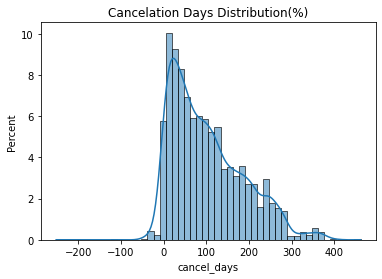

In [33]:
# Plot Histogram to check distribution of new column and check for inconsistencies
sns.histplot(data=contracts_df, x="cancel_days", stat="percent", kde=True).set_title("Cancelation Days Distribution(%)")

The histogram shows there are negative values, this may be possible since a worker or company may cancel a contract before the work period actually starts. A boxplot would allow to look at the dimension of negative values. 

Text(0.5, 1.0, 'Cancelation Days Boxplot')

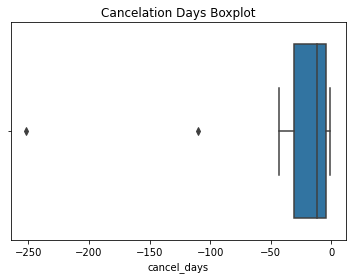

In [34]:
# Plot boxplot to easily check for outliers
sns.boxplot(data=contracts_df.loc[contracts_df.cancel_days < 0,:], x="cancel_days").set_title("Cancelation Days Boxplot")

In [35]:
rows_outliers1 = contracts_df.loc[contracts_df.cancel_days < -100,:].shape[0]
rows_outliers2 = contracts_df.loc[contracts_df.cancel_days.between(-100,0,inclusive="neither"),:].shape[0]

f"There are {rows_outliers1} records with a value higher than -100 and {rows_outliers2+2} total records with negative values."

'There are 2 records with a value higher than -100 and 72 total records with negative values.'

In [36]:
contracts_df.loc[contracts_df.cancel_days.between(-100,0,inclusive="neither"),"total_gross"].head()

347         456.28
829     167.142857
847         1030.0
1009         77.68
1185         45.06
Name: total_gross, dtype: Float64

- Since there are only 2 records with unlikely values, they are removed from the dataset.
- The remaining 70 records, although unlikely might be true and have positive `gross_total` values (target variable). They are thus maintained within the dataset.

In [37]:
contracts_df = contracts_df.loc[~(contracts_df.cancel_days < -100),:]

#### Creation on a New Variable That Measures Work Period Number of Days<a name='wp' />

**Taking into account the previous assumption that work periods refer to the actual work duration, it is very plausible this will have a positive relationship with the target variable `total_gross`.**

Therefore, following the previous logic, it is useful to compute the time diference between `wp_starts_on`and `wp_ends_on`. 

In [1]:
# Create new feature with time difference between cancelation date and contract date
contracts_df["wp_days"] = (contracts_df["wp_ends_on"] - contracts_df["wp_starts_on"]).dt.days

NameError: name 'contracts_df' is not defined

Text(0.5, 1.0, 'Distribution of Work Period Days(%)')

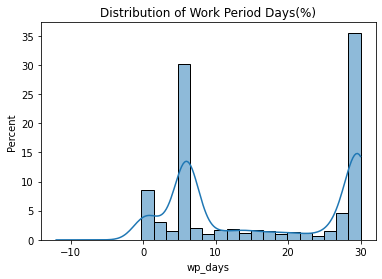

In [39]:
# Plot Histogram to check distribution of new column and check for inconsistencies
sns.histplot(data=contracts_df, x="wp_days", stat="percent", kde=True).set_title("Distribution of Work Period Days(%)")

The histogram above also shows there might be a few records with negative values, if they are less than 5 they should be removed and considered a wrong data entry problem, since the work periods should always be positive.

#### Exploration of Other Date Range Outliers<a name='others' />

Other Dates are explored in order to filter for other outliers. The recently created Variable `wp_days` is mainly used.

In [40]:
contracts_df = contracts_df.loc[~contracts_df.wp_days < 0,:]

In [41]:
contracts_df.shape[0]

19976

In [42]:
contracts_df.loc[(contracts_df['hiring_starts_on']).dt.year == 2019,:].groupby("hiring_starts_on").count()

,hiring_id,wp_id,hiring_status,wp_status,business_model,company_id,company_name,hiring_created_at,wp_created_at,hiring_ends_on,wp_starts_on,wp_ends_on,job_function,job_country,candidate_id,candidate_name,total_gross,est_total_gross,currency,issue_reported,contract_type,gross_wage_amount,gross_wage_time_unit,gross_wage_currency_id,work_period_unit,work_period_amount,work_period_hours,fee_percentage,cancellation_date,cancel_days,wp_days
hiring_starts_on,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-10-25,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1


In [43]:
contracts_df.loc[(contracts_df['hiring_starts_on']).dt.year == 2015,:].groupby("hiring_starts_on").count()

,hiring_id,wp_id,hiring_status,wp_status,business_model,company_id,company_name,hiring_created_at,wp_created_at,hiring_ends_on,wp_starts_on,wp_ends_on,job_function,job_country,candidate_id,candidate_name,total_gross,est_total_gross,currency,issue_reported,contract_type,gross_wage_amount,gross_wage_time_unit,gross_wage_currency_id,work_period_unit,work_period_amount,work_period_hours,fee_percentage,cancellation_date,cancel_days,wp_days
hiring_starts_on,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-02-02,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,0,0,27
2015-03-16,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,16,16,56
2015-05-04,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,5,5,72
2015-05-26,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,12,12,90
2015-06-29,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,2,2,101
2015-09-28,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,11,11,109


Text(0.5, 1.0, 'Monthly Evolution of Work Periods')

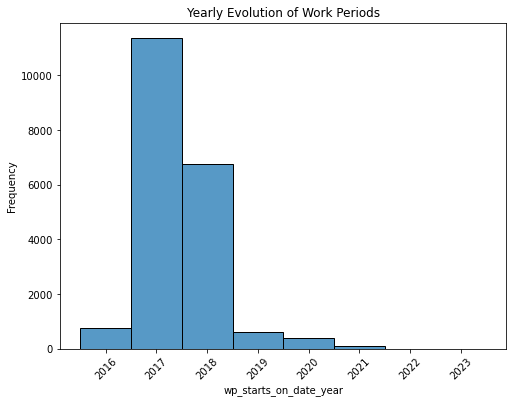

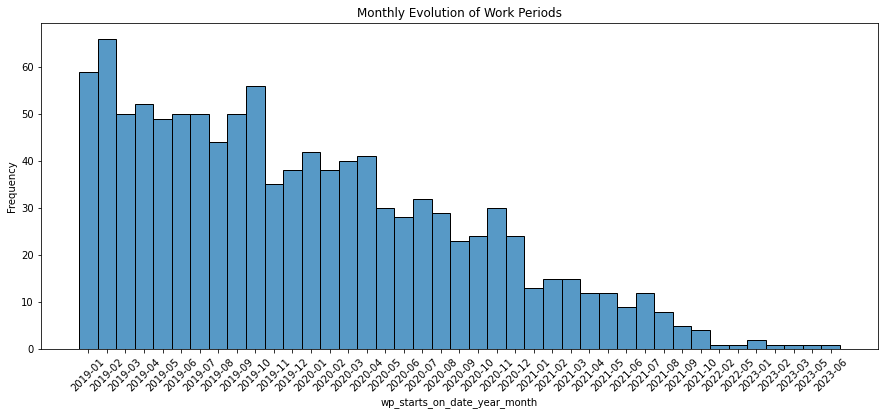

In [44]:
contracts_df["wp_starts_on_date_year_month"] = contracts_df.wp_starts_on.dt.strftime(date_format='%Y-%m')
contracts_df["wp_starts_on_date_year"] = contracts_df.wp_starts_on.dt.strftime(date_format='%Y')
contracts_df["wp_starts_on_date_month"] = contracts_df.wp_starts_on.dt.strftime(date_format='%m')

plt.figure(figsize=(8, 6))
plt.xticks(rotation=45)
sns.histplot(data=contracts_df.sort_values(by="wp_starts_on_date_year"), x="wp_starts_on_date_year", stat="frequency").set_title("Yearly Evolution of Work Periods")

plt.figure(figsize=(15, 6))
plt.xticks(rotation=45)
sns.histplot(data=contracts_df.loc[contracts_df.wp_starts_on_date_year.isin(["2019","2020","2021","2022","2023"]),:]\
             .sort_values(by="wp_starts_on_date_year_month"), x="wp_starts_on_date_year_month", stat="frequency").set_title("Monthly Evolution of Work Periods")

In [45]:
contracts_df.loc[contracts_df.wp_starts_on_date_year.isin(["2020","2021","2022","2023"]),["wp_starts_on_date_year","wp_id"]].groupby(by="wp_starts_on_date_year", as_index=False).count()

,wp_starts_on_date_year,wp_id
0,2020,381
1,2021,105
2,2022,2
3,2023,6


In [46]:
# Remove Outliers
contracts_df = contracts_df.loc[contracts_df.wp_starts_on <= "2020-12-31",:]

#### **<a name='wp_date'>Data Range Outliers</a>**

Considering the time scope is important in order to predict the target variable, **an assumption is made that records with `wp_start_date` $>=$ 2020  will be treated as outliers and removed**. 

This decision is based on 3 factors:
1. These are only $113$ values to be removed, which will not significantly affect other features.  
2. Not all years $>2020$ have registers for full months.
3. The previous Bar Charts show that `work_start_date` is consistently decreasing over the years

### Categorical Data Check<a name='categorical' />

A glance over descriptive statistics for categorical features allows to derive initial insights.

In [47]:
# Show descriptive statistics of categorical features to look for more insights or discrepencies
contracts_df.describe(include=("string", "boolean"), datetime_is_numeric=False)

,hiring_id,wp_id,hiring_status,wp_status,business_model,company_id,company_name,job_function,job_country,candidate_id,candidate_name,currency,issue_reported,contract_type,gross_wage_time_unit,gross_wage_currency_id,work_period_unit
count,19863,19863,19863,19863,19863,19863,19863,19863,19863,19863,19863,19863,19863,19863,19863,19863,19863
unique,9156,19779,5,7,2,558,560,51,2,7593,6588,2,2,3,3,2,4
top,311569,6526733,ready_to_work,paid,staffing_agency,211514331,Eaton LLC,drop-guy,ES,57508502,Carolyn Hickman,EUR,False,full_time,hour,EUR,month
freq,22,3,9718,10543,15170,3907,2566,7022,14000,56,38,14000,15423,13675,10650,14000,12633


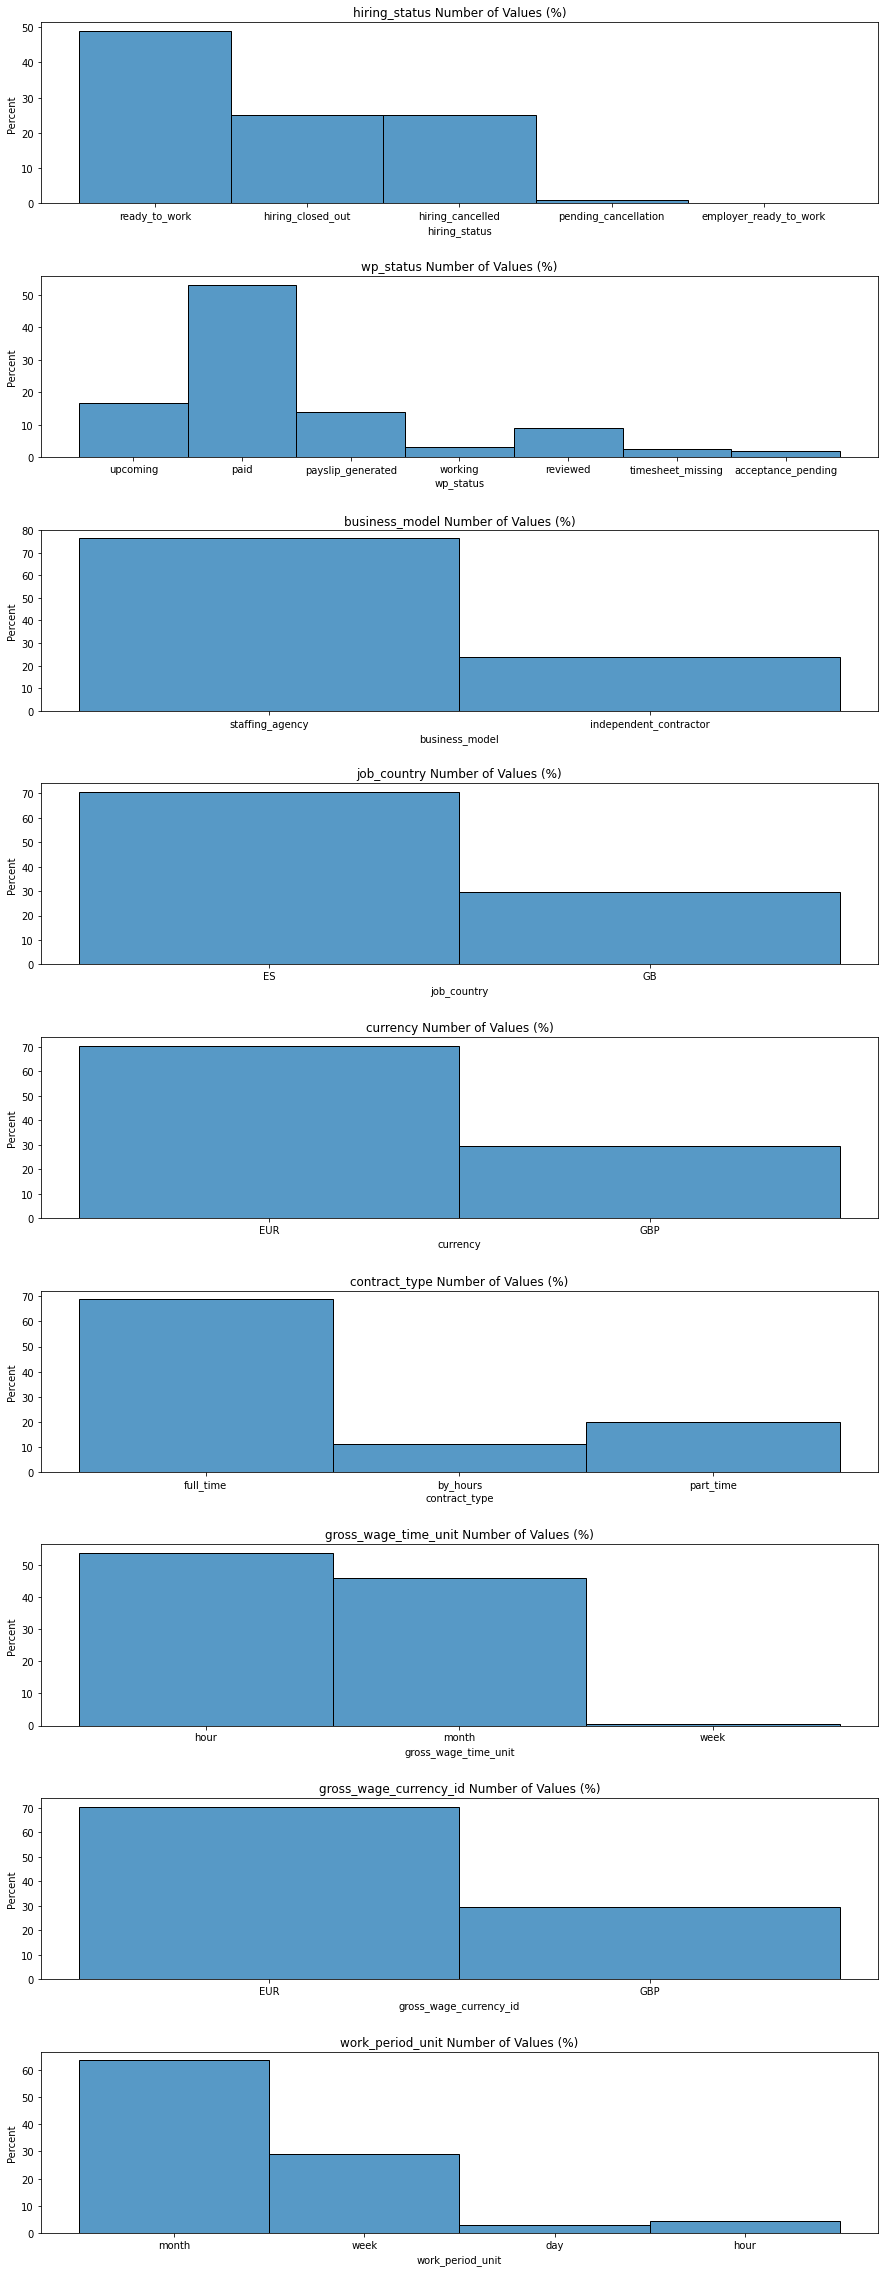

In [48]:
# plot the categoricals variables
string_cols_list1 = []
for col_name in contracts_df.select_dtypes(include="string"):
        if contracts_df[col_name].nunique() < 15:
                string_cols_list1.append(col_name)

fig = plt.figure(figsize=(15, 50))
fig.subplots_adjust(hspace=0.4)

for i, col_name in zip(range(1,10), string_cols_list1):
    ax=fig.add_subplot(11, 1, i)
    sns.histplot(data=contracts_df, x=col_name, stat="percent").set_title(f"{col_name} Number of Values (%)")

plt.show()

In [49]:
#Check the job_function and company names with most records
print(contracts_df.job_function.value_counts(normalize=True).head(5), contracts_df.company_name.value_counts(normalize=True).head(5), sep="\n\n")

drop-guy                0.353522
f1-guy                   0.21895
minister                0.111061
support-guy             0.074812
restaurant-hotel-guy    0.060011
Name: job_function, dtype: Float64

Eaton LLC                   0.129185
Smith and Sons              0.069979
Harris, Allen and Conrad    0.049892
Le Inc                      0.043699
Norman PLC                  0.038715
Name: company_name, dtype: Float64


The plots and tables above allow to see the distribution of categoricall variables in relation to their occurences percentages. 

These plots allow us to take the their dimensions into account when deriving hypothesis in comparison to other features (such as `total_gross` since they can heavily influence results.

## Answers to JT Specific Questions

### Salary Feature Exploration

- Any particular pattern among the salary values? (for `job_function`, `company_name`, period of the year, etc.)?

To begin with, the distribution of `fee_percentage` is analysed to check for relevant insights.

Note that outliers have already been removed (see Numerical Data Check).

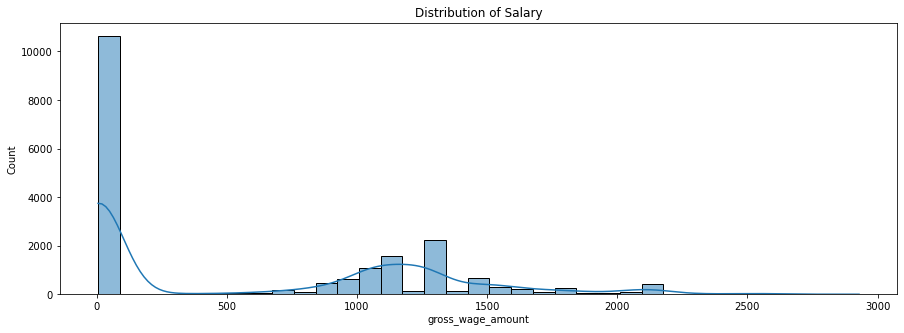

In [50]:
# Plot the distribution of fee_percentage   
plt.figure(figsize=(15, 5))
sns.histplot(data=contracts_df, x="gross_wage_amount", kde=True).set_title("Distribution of Salary")
plt.show()

We can see that the `gross_wage_amount` distribution is heavily right-skewed and there is indication that it might be bi-modal.

However values seem to be highly concentrated around $0$ and $1000-1500$.

In order to further analyse the distribution a transformation is applie 

**Note:** A Box-Cox test could indicate which transformation would be more appropriate in relation the data available, however, for simplification purposes a $log^{10}$ is applied.

Text(0.5, 1.0, 'Distribution of Salary (Log Transformation)')

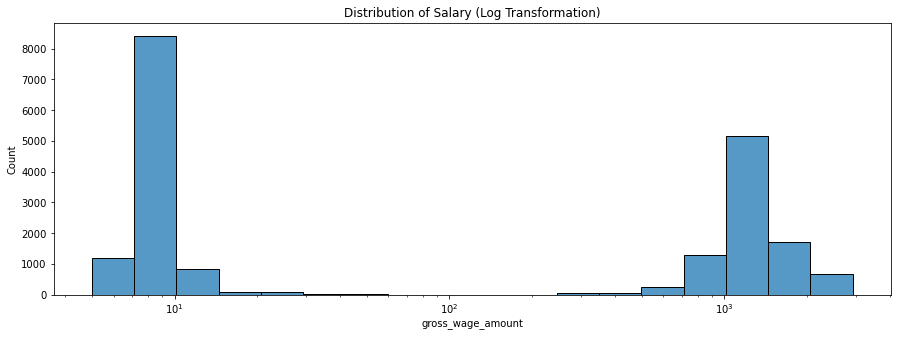

In [51]:
# A log base10 transformation is applied to the X axis 
plt.figure(figsize=(15, 5))
sns.histplot(data=contracts_df, x="gross_wage_amount", log_scale=True).set_title("Distribution of Salary (Log Transformation)")

By applying this transformation we can see that the distribution is bi-modal. This can be extrapolated to the analysis seen before, that the `gross_wage_amount` is measured in different units.

In order to explore this inference, the `gross_wage_time_unit` feature is applied to the histogram.

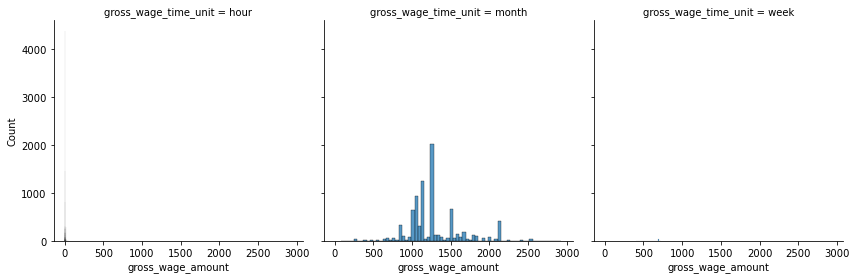

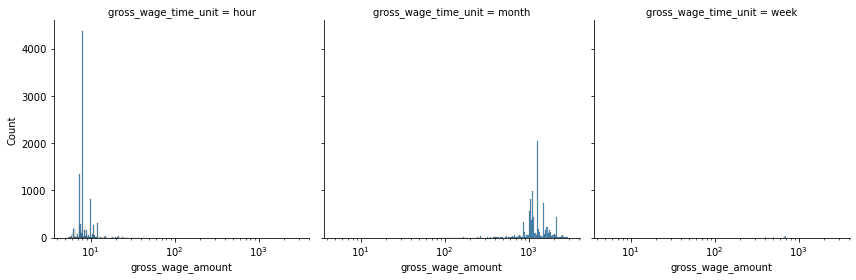

In [52]:
# Plot histogram without log transformation
g = sns.FacetGrid(contracts_df, col="gross_wage_time_unit", margin_titles=True,height=4)
g.map(sns.histplot, "gross_wage_amount", log_scale=False)

# with log trasnformation
g = sns.FacetGrid(contracts_df, col="gross_wage_time_unit", margin_titles=True,height=4)
g.map(sns.histplot, "gross_wage_amount", log_scale=True)

Indeed, the histogram show that values for `gross_wage_amount` are mainly concentrated around `month` and in a few cases `hour`. 

Even though there are $3$ unique units, the `week` time unit is not representative.

This probably means that workers are mainly paid in monthly time units and using hourly work periods, therefore this feature will be important in order to derive target variable `total_gross` and should be included in the predictive model.

Next, an hypothesis that `gross_wage_amount` and target variable `total_gorss` might follow a trend relationship, is explored, since as salaries increase amount paid should also increase.

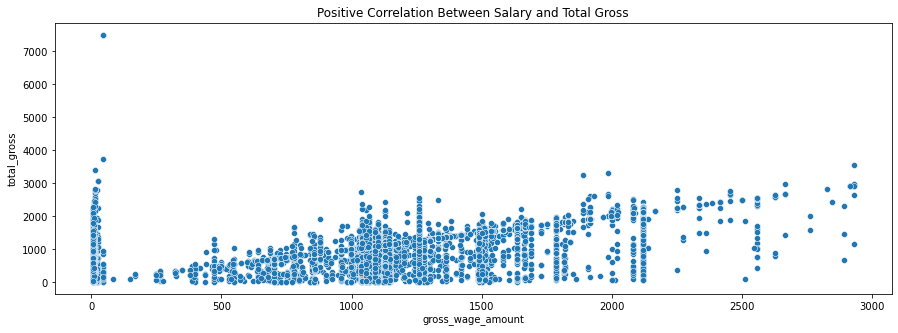

In [53]:
# Generate Scatterplot of Salaries vs Target Variable 
plt.figure(figsize=(15, 5))
sns.scatterplot(data=contracts_df, x="gross_wage_amount",y="total_gross").set_title("Positive Correlation Between Salary and Total Gross")
plt.show()

As expected, the Scatterplot above shows a positive correlation between both variables. 

However, it is important to note that some values are scattered along the 0 axis.
- A reason could be that `gross_wage_amount` were wrongly inputted.
- On the other hand, it could be related to the different measuring units mentioned before, e.g.: hourly rates with high work periods. 
- In any case, for simplification no deep dive is required, in the future, this could be further explored. 

Next, the period of the year is analysed to look for possible patterns.

**For this analysis and simplification purposes an assumption is made that all work periods are paid at month end of its work period allocation.**

With this given, the `work_ends_on` datetime series is used to extract quarters and plotted to check for graphical inferences.

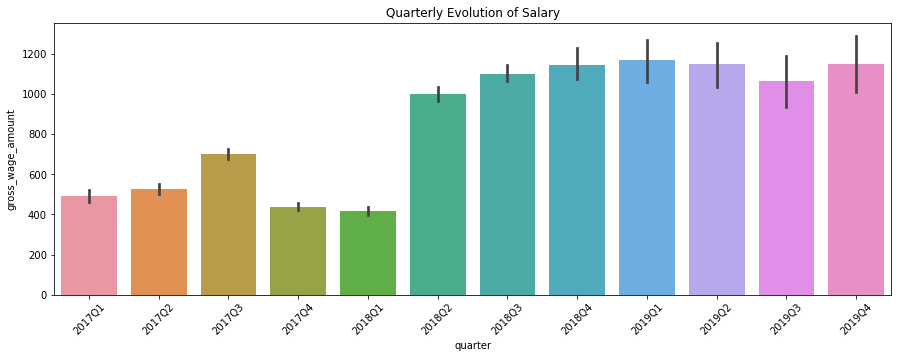

In [54]:
# Create new column that show running qurter and year
contracts_df["quarter"] = contracts_df.wp_ends_on.dt.to_period('Q')

# Plot by Salaries per running quarter
plt.figure(figsize=(15, 5))
sns.barplot(data=contracts_df.loc[contracts_df.wp_ends_on.between("2017-01-01","2020-01-01"),:].sort_values(by=["quarter"]),\
            x="quarter", y="gross_wage_amount").set_title("Quarterly Evolution of Salary")
plt.xticks(rotation=45)
plt.show()

There seems to be a trend around middle quarter during the year, they appear to be higher than other ones.

The analysis is expanded to whole period to check for more patterns. 

In [55]:
# Extract quarter
contracts_df["wp_ends_on_quarter"] = contracts_df.wp_ends_on.dt.quarter

In [56]:
# Take descriptive statistics for pattern recognition
contracts_df.loc[:,["wp_ends_on_quarter","gross_wage_amount","wp_days","fee_percentage","total_gross"]]\
                .groupby(by=("wp_ends_on_quarter"), as_index=False).mean()

,wp_ends_on_quarter,gross_wage_amount,wp_days,fee_percentage,total_gross
0,1,470.88091,14.216141,6.565453,650.22247
1,2,737.584716,18.716479,6.011589,801.297887
2,3,781.264677,18.217381,5.592115,838.573057
3,4,496.090292,15.338648,6.249859,724.509342


Text(0.5, 1.0, 'Total Quarter Distribution of Salary')

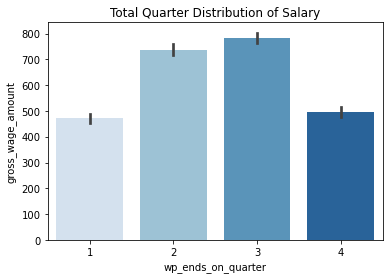

In [57]:
sns.barplot(data=contracts_df, x="wp_ends_on_quarter", y="gross_wage_amount", palette="Blues").set_title("Total Quarter Distribution of Salary")

The mean of `gross_wage_amount` and Bar Chart confirm previous indication that Salaries are concentrated on the 2nd and 3rd Quarters.

In [58]:
# Drop recently created column since it will not be necessary
contracts_df.drop(columns="quarter", inplace=True)

In addition, since `gross_wage_amount` and target variable `total_gross` share a strong relationship (descriptive statistics above also indicate they share similar averages), an hypothesis is drawn that the target variable might follow the same pattern.

Text(0.5, 1.0, 'Total Quarter Distribution of Total Gross')

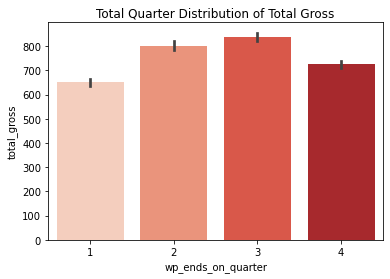

In [59]:
# Check if there is a relationship between quarters and target variable
sns.barplot(data=contracts_df, y="total_gross",x="wp_ends_on_quarter", palette="Reds").set_title("Total Quarter Distribution of Total Gross")

The relationship for quarters vs `total_gross` appears to follow the same pattern as quarters vs `gross_wage_amount`, therefore this variable should be included as a relevant feature to predict the target variable in the model.

Moreover, reationships between Salary and Job functions as well as Companies are analysed.

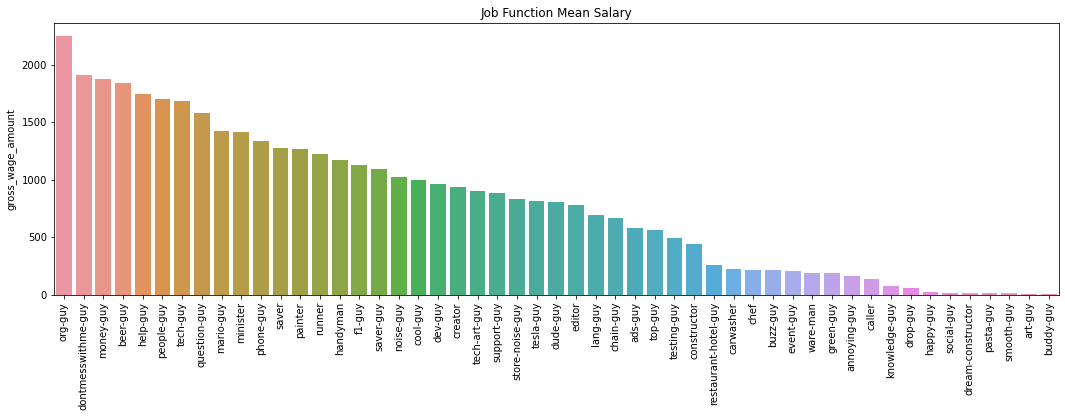

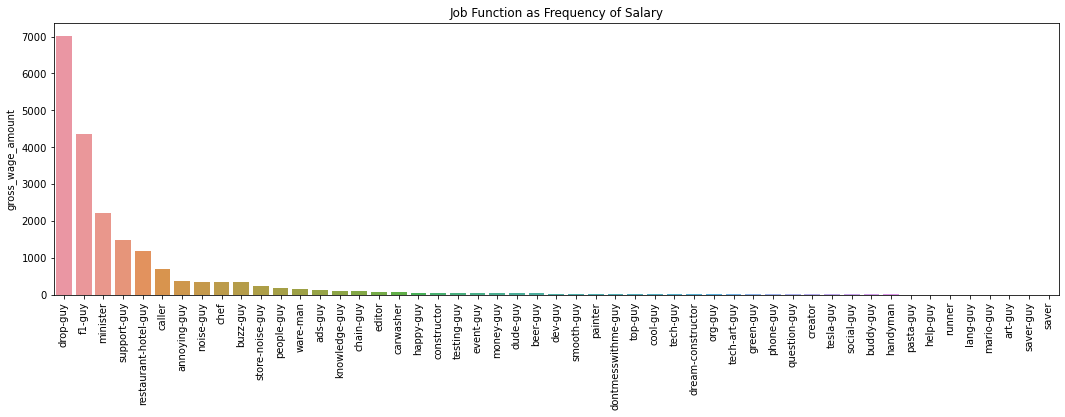

In [60]:
# Group and plot sorted values for gross_work_amount by job_function MEAN
fig = plt.figure(figsize=(18, 5))
sns.barplot(data=contracts_df.groupby("job_function", as_index=False).mean()\
            .sort_values(by="gross_wage_amount", ascending=False), x="job_function", y="gross_wage_amount", ).set(title=("Job Function Mean Salary"), xlabel=None)
plt.xticks(rotation=90)
plt.show()

# Group and plot sorted values for gross_work_amount by job_function COUNT
fig = plt.figure(figsize=(18, 5))
sns.barplot(data=contracts_df.groupby("job_function", as_index=False).count()\
            .sort_values(by="gross_wage_amount", ascending=False), x="job_function", y="gross_wage_amount").set(title=("Job Function as Frequency of Salary"), xlabel=None)
plt.xticks(rotation=90)
plt.show()

From the above table, we can see that there seems to be a negative relationship between `job_functions` means and in respect to Salaries. 

This means that as `job_functions` are more frequent, average salary tend to decrease.

For instance, the most frequent job `drop-guy` has an average salary of less than 50.

However, this might be due to Salaries being affected by the different work period/salary measuring units mentioned before (e.g.: hours vs months).

Therefore, it is dificult to establish a common pattern for specific jobs.

The same relationship seems to be present in regards to `company_name`.

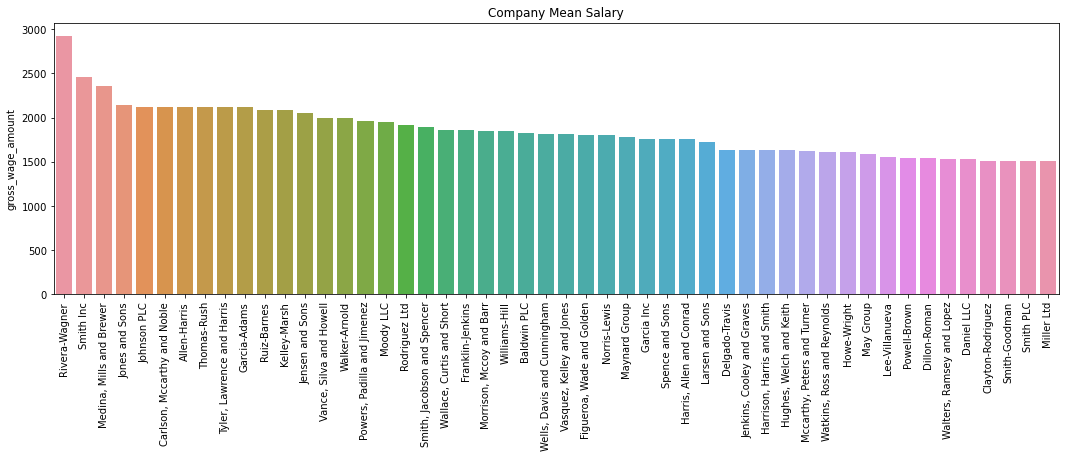

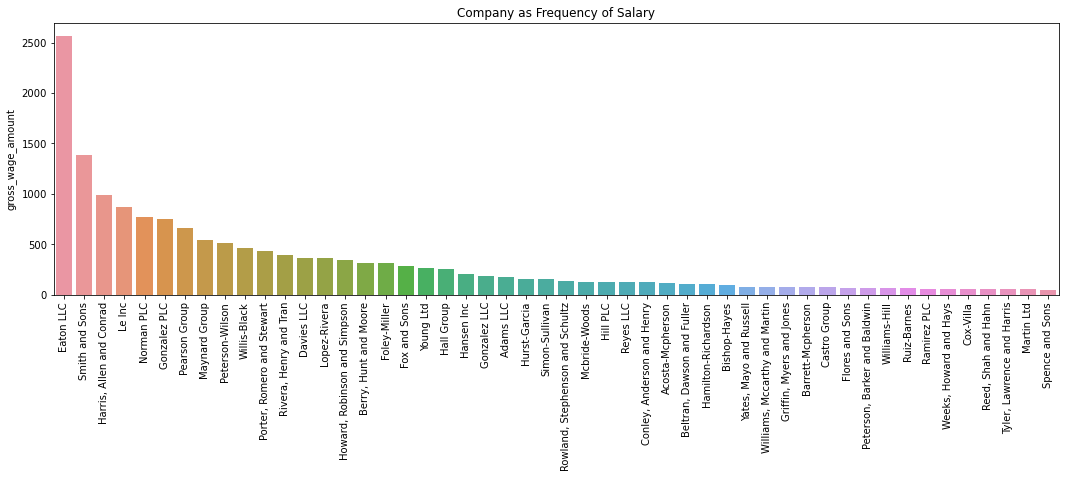

In [61]:
# Group and plot sorted values for gross_work_amount by job_function MEAN
fig = plt.figure(figsize=(18, 5))
sns.barplot(data=contracts_df.groupby("company_name", as_index=False).mean()\
            .sort_values(by="gross_wage_amount", ascending=False).head(50),\
            x="company_name", y="gross_wage_amount").set(title=("Company Mean Salary"), xlabel=None)
plt.xticks(rotation=90)
plt.show()

# Group and plot sorted values for gross_work_amount by job_function COUNT
fig = plt.figure(figsize=(18, 5))
sns.barplot(data=contracts_df.groupby("company_name", as_index=False).count()\
            .sort_values(by="gross_wage_amount", ascending=False).head(50),\
            x="company_name", y="gross_wage_amount").set(title=("Company as Frequency of Salary"), xlabel=None)
plt.xticks(rotation=90)
plt.show()

Last but not least, `gross_wage_amount` is plotted against categorical features.

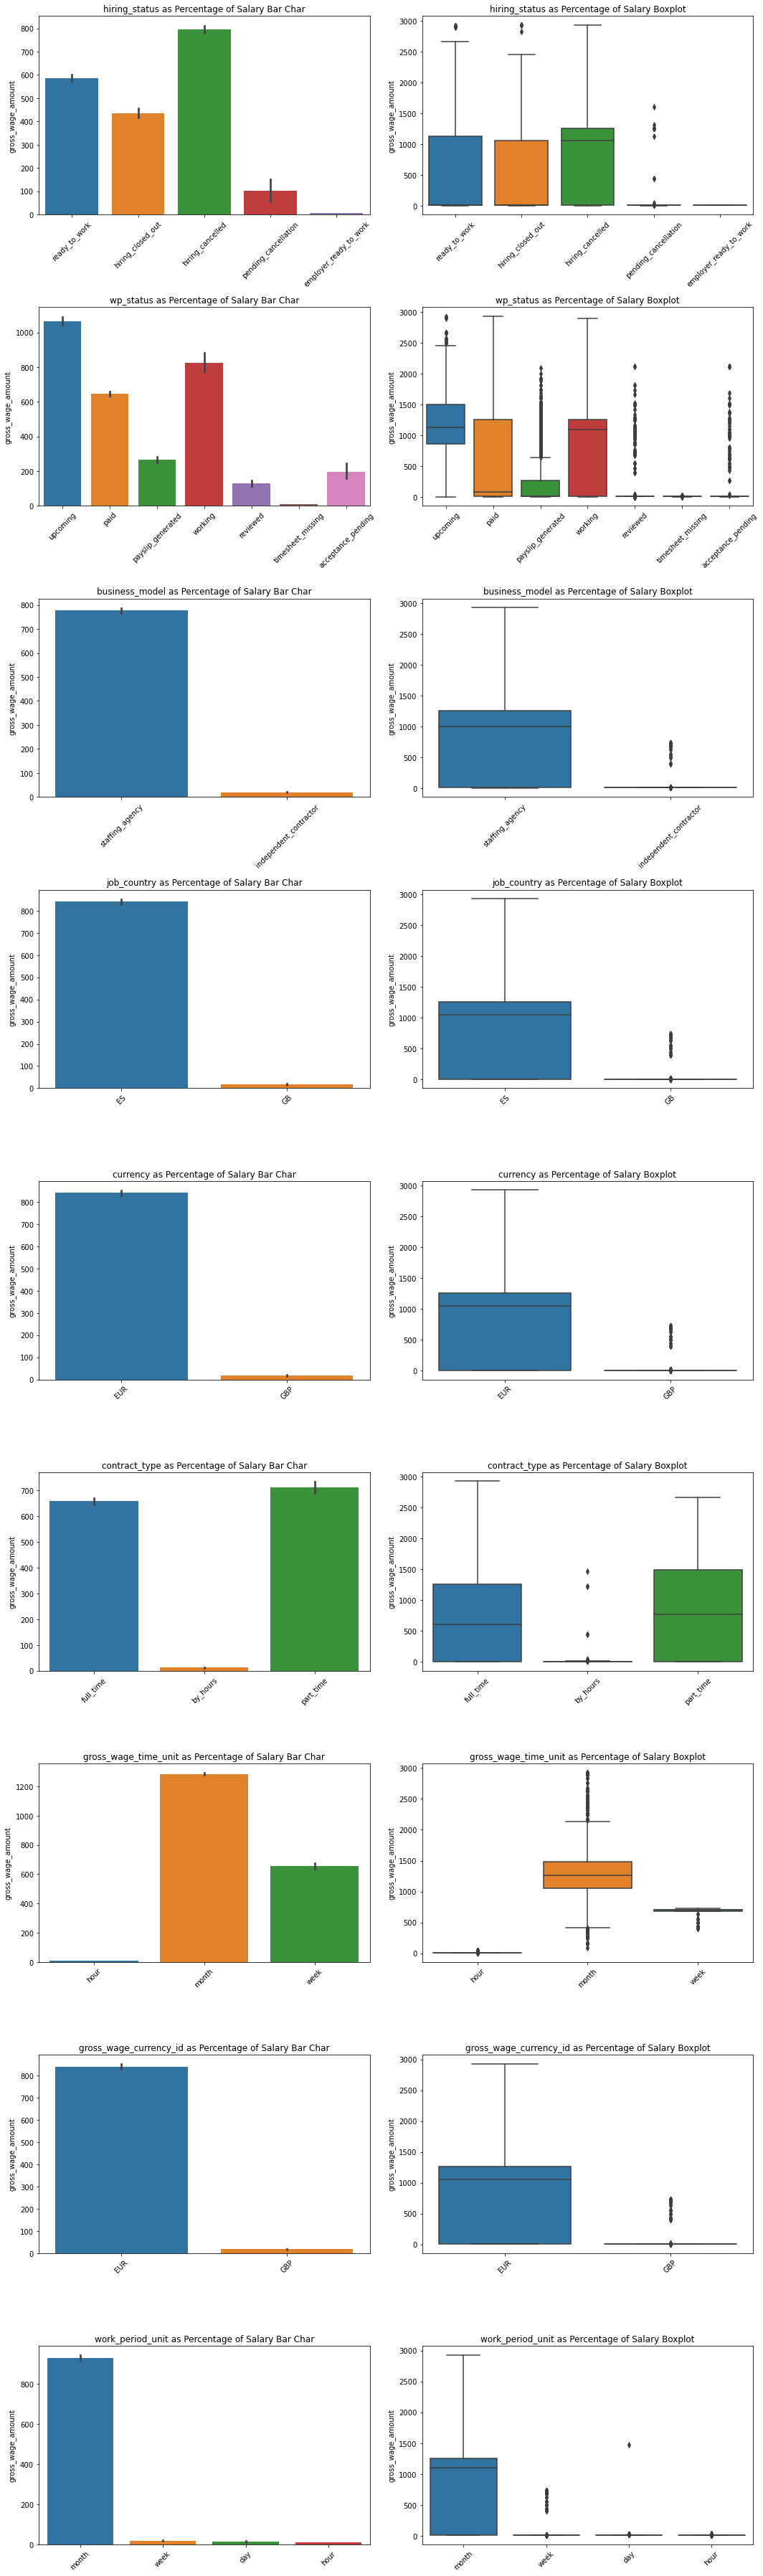

In [62]:
# Filter for categorical data only that have fewer than 15 labels (for visualization purposes)
string_cols_list = []
for col_name in contracts_df.select_dtypes(include="string"):
        if contracts_df[col_name].nunique() < 15:
                string_cols_list.append(col_name)

# Generate Grid
fig = plt.figure(figsize=(15, 50))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Create list of tuples of iterables and map them with corresponding graphs
for x,i,col_name in zip(range(1,18,2), range(2,19,2), string_cols_list):
    ax = fig.add_subplot(9, 2, x)
    sns.barplot(data=contracts_df, x=col_name, y="gross_wage_amount",).set(title=(f"{col_name} as Percentage of Salary Bar Char"), xlabel=None)
    plt.xticks(rotation=45)
    ax = fig.add_subplot(9, 2, i)
    sns.boxplot(data=contracts_df, x=col_name, y="gross_wage_amount", ).set(title=(f"{col_name} as Percentage of Salary Boxplot"), xlabel=None)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Paterns & Insights:**

- Specific Jobs and Companies share different salaries, due to a lack of patterns, this variable should be left outside prediction model. 
- There is a concentration of salaries in quarters $2$ and $3$. This feature should be added as an additional feature in order to better predict `total_gross`.
- There is a strong positive relationship between `gross_wage_amount` and target variable `total_gross`. Therefore salary is an important feature to include in model.
- Regarding Categorical Varibales:
  - We can see that most workers are contracted through a staffing agency, whilst a very small percentage includes independent contractors.
  - Also, most workers are under part-time or full-time contracts in what respects Salaries.
- These categorical variables could be further explored in respect to `total_gross` ad included with preprocessing techniques such as label encoder to include in the preditive model. However for simplification purposes, this will be left as a futurre task. 

### Fee Percentage Feature Exploration

- Any interesting relation between the `fee_percentage` and the `job_function` or `company_name`?

From a previous exploration in the Numerical Data Check section, certain insights pointed out to a possible:
- Positive relationship between high `fee_percentage` and certain `jobs_functions` as well as `company_name`.
- Association between `cancellation_date` and `fee_percentage`.

These relationships are now explored in more detail.

To start-off with, the distribution of `fee_percentage` is analysed.

Text(0.5, 1.0, 'Fee Percentage Distribution')

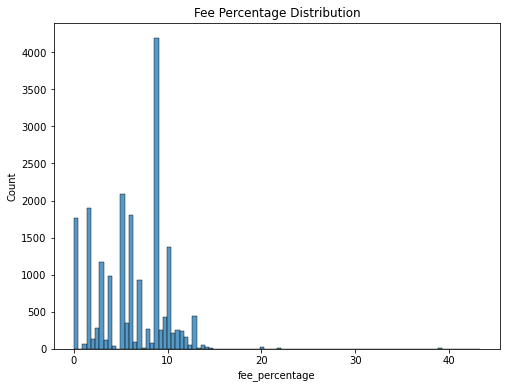

In [63]:
# Plot the distribution of fee_percentage   
plt.figure(figsize=(8, 6))
sns.histplot(data=contracts_df, x="fee_percentage").set_title("Fee Percentage Distribution")

To begin with, the distribution has several modes with most occurences ranging between $0$ and $15$.

However, there seems to be a aggregation of records around $0$%, $5$% and $10$%.

In [64]:
# Group fee_percentages by company_name count
fee_df1 = contracts_df.loc[:,["company_name","job_function","fee_percentage","cancellation_date"]]\
        .groupby(by=("company_name"), as_index=False).count()

# Group fee_percentages by fee_percentage mean
fee_df2 = contracts_df.loc[:,["company_name","job_function","fee_percentage","cancellation_date"]]\
        .groupby(by=("company_name"), as_index=False).mean()

# Join both Dataframes to plot relationship between fee_percentages in relation to company_name
fee_df = pd.merge(left=fee_df1, right=fee_df2, how="inner", on="company_name", suffixes=("_count","_mean"))

# Create 2 separate Dataframes for easier sorting
count_fee_df = fee_df.sort_values("fee_percentage_count", ascending=False).head(5).copy()
mean_fee_df = fee_df.sort_values("fee_percentage_mean", ascending=False).head(5).copy()

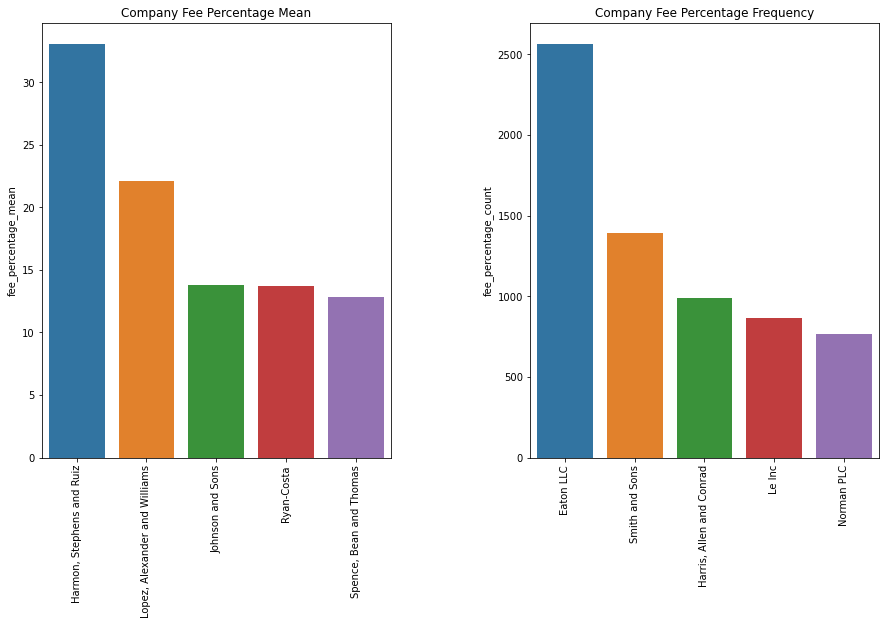

In [65]:
fig = plt.figure(figsize=(15, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 2, 1)
sns.barplot(data=mean_fee_df, x="company_name", y='fee_percentage_mean').set(title=("Company Fee Percentage Mean"), xlabel=None)
plt.xticks(rotation=90)

ax = fig.add_subplot(1, 2, 2)
sns.barplot(data=count_fee_df, x="company_name", y='fee_percentage_count').set(title=("Company Fee Percentage Frequency"), xlabel=None)
plt.xticks(rotation=90)

plt.show()

In [66]:
company_feename = count_fee_df.iloc[0,0]
company_feename_mean = count_fee_df.iloc[0,-1]

company_feemean_name = mean_fee_df.iloc[0,0]
company_feemean_count = mean_fee_df.iloc[0,-1]

f"The company that pays the most amount of fees paid to JT is {company_feename} with a mean of {round(company_feename_mean,1)}%. \
The company with the highest mean fee paid to JT is {company_feemean_name} with {int(company_feemean_count)} occurences."

'The company that pays the most amount of fees paid to JT is Eaton LLC with a mean of 9.0%. The company with the highest mean fee paid to JT is Harmon, Stephens and Ruiz with 33 occurences.'

In [67]:
fee_df.corr()

,job_function,fee_percentage_count,cancellation_date,fee_percentage_mean
job_function,1.000000,1.000000,0.447274,-0.080965
fee_percentage_count,1.000000,1.000000,0.447274,-0.080965
cancellation_date,0.447274,0.447274,1.000000,-0.097831
fee_percentage_mean,-0.080965,-0.080965,-0.097831,1.000000


In [68]:
# Group fee_percentages by job_function count
fee_df1 = contracts_df.loc[:,["company_name","job_function","fee_percentage","cancellation_date"]]\
        .groupby(by=("job_function"), as_index=False).count()

# Group fee_percentages by fee_percentage mean
fee_df2 = contracts_df.loc[:,["company_name","job_function","fee_percentage","cancellation_date"]]\
        .groupby(by=("job_function"), as_index=False).mean()

# Join both Dataframes to plot relationship between fee_percentages in relation to job_function
fee_df = pd.merge(left=fee_df1, right=fee_df2, how="inner", on="job_function", suffixes=("_count","_mean"))

# Create 2 separate Dataframes for easier sorting
count_fee_df = fee_df.sort_values("fee_percentage_count", ascending=False).head(5).copy()
mean_fee_df = fee_df.sort_values("fee_percentage_mean", ascending=False).head(5).copy()

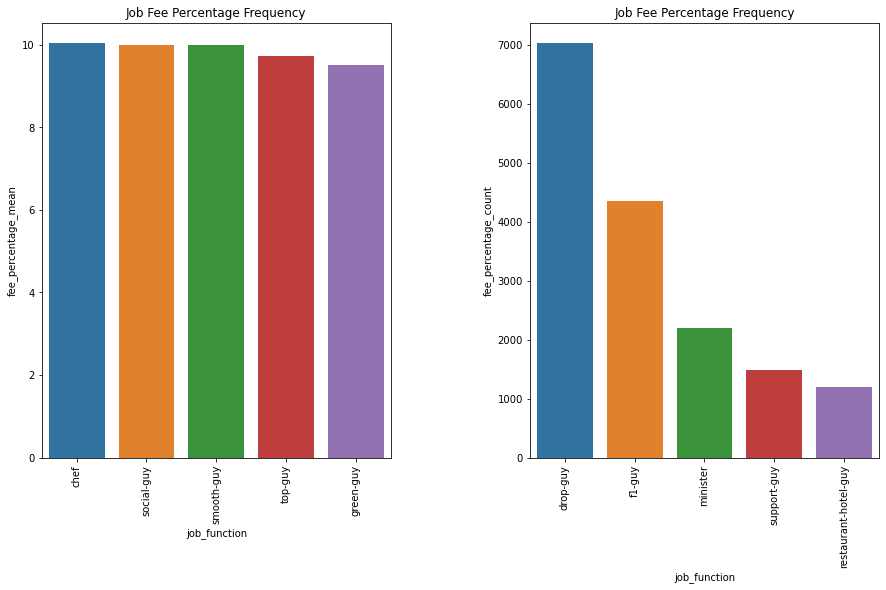

In [69]:
# Plot relationship
fig = plt.figure(figsize=(15, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 2, 1)
sns.barplot(data=mean_fee_df, x="job_function", y='fee_percentage_mean').set_title("Job Fee Percentage Frequency")
plt.xticks(rotation=90)

ax = fig.add_subplot(1, 2, 2)
sns.barplot(data=count_fee_df, x="job_function", y='fee_percentage_count').set_title("Job Fee Percentage Frequency")
plt.xticks(rotation=90)

plt.show()

In [70]:
job_feename = count_fee_df.iloc[0,0]
job_feename_mean = count_fee_df.iloc[0,-1]

job_feemean_name = mean_fee_df.iloc[0,0]
job_feemean_count = mean_fee_df.iloc[0,-1]

f"The company that pays the most amount of fees paid to JT is {job_feename} with a mean of {round(job_feename_mean,1)}%. \
The company with the highest mean fee paid to JT is {job_feemean_name} with {int(job_feemean_count)} occurences."

'The company that pays the most amount of fees paid to JT is drop-guy with a mean of 7.7%. The company with the highest mean fee paid to JT is chef with 10 occurences.'

In [71]:
fee_df.corr()

,company_name,fee_percentage_count,cancellation_date,fee_percentage_mean
company_name,1.000000,1.000000,0.784810,0.001277
fee_percentage_count,1.000000,1.000000,0.784810,0.001277
cancellation_date,0.784810,0.784810,1.000000,-0.020165
fee_percentage_mean,0.001277,0.001277,-0.020165,1.000000


**Patterns & Insights:**

- `fee_percentage` can be inferred to be distributed around 3 values: $0$%, $5$% and $10$%. 
- The analysis shows that there seems not to be a relationship between `job_function` and `company_name` in respect to `fee_percenttage`, due to very weak correlation and no clear pattern identified other than:
  - As companies are added there seems to be a small fee decrease in certain cases. 
  - The opposite pattern is observed for job increases.
- However, it is interesting to note that some companies seem to pay higher fee in favour of Jobandtalent than others. Nevertheless, these are not optimized sources of revenue, since they do not represent the most amount of companies or job functions, as shown by comparing the feature's barplots.
- Lastly, what seems to have moderate to strong positive relationships are `cancellation_date` and `job_function` as well as `company_name`. 

Last but not least, the feature `fee_percentage` is plotted vs target variable `total_gross` to check if patterns emerge.

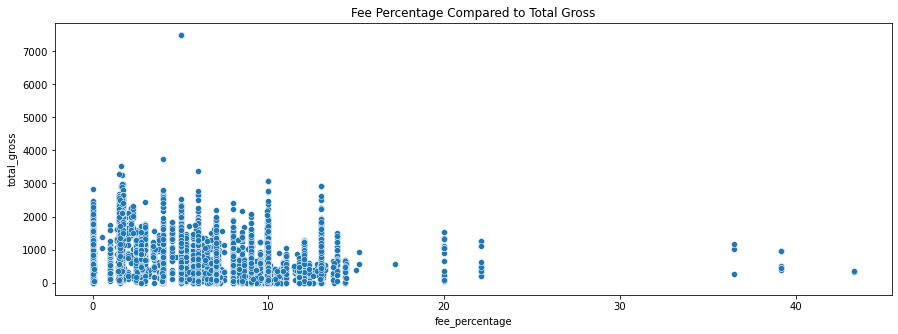

In [72]:
# Generate Scatterplot of Salaries vs Target Variable 
plt.figure(figsize=(15, 5))
sns.scatterplot(data=contracts_df, x="fee_percentage",y="total_gross").set_title("Fee Percentage Compared to Total Gross")
plt.show()

From the above graphical representation, we can infer that `Total_Gross` has a low negative correlation with `fee_percentage`.

**This finding confirms that `fee_percentage` should be included as an important Feature to predict Total Gross**.

### Time Dimension Exploration

- Which are the `job_function` and `company_name` that require to work the most on the weekend?

As mentioned previously, the features to consider here are `wp_starts_on` and `wp_ends_on` as they have been assumed as the best estimator of subcontracts duration.

Therefore, the created variable `wp_days` will be used to estimate and extract weekends, since it shows the exact number of days worked during a work period.

Also, previous data exploration in the <a href=#categorical>Categorical Data Check section</a> shows that work periods `gross_wage_unit` and `work_period_unit` vary according to hours, days, weeks and months.

**In order to calculate the number of weekends, a subset of the dataset will be used, by:**
- **Filtering for workers that are paid based on an hourly rate, since `wp_days` is that same unit.**
- **Filtering the `work_period_unit` that are not months since it is a different time unit**

Although, the previous analysis also showed that `gross_wage_unit` has most records expressed as an hourly rate, it also showed that `work_period_unit` records are mainly condensed around months.

Therefore, in order to answer this question, **an assumption is made that even though this will only represent approximately $35$% of the whole date, it is a fair representation of the whole dataset.**

In [73]:
# Slice Contracts Dataframe for corresponding filters (mentioned above) 
weekend_df = contracts_df.loc[(contracts_df.gross_wage_time_unit == "hour") & (contracts_df.work_period_unit.isin(["week","hour"])),:].copy()

In [74]:
# Function that generates a new datetime Series with the range from wp_starts_on vs wp_ends_on including all days for that work period
def find_date_range(df):
    l = pd.date_range(df.loc['wp_starts_on'], df.loc['wp_ends_on'])
    return pd.Series([l])

weekend_df['days'] = weekend_df.apply(find_date_range, axis=1)

In [75]:
# Function that extracts if the work period included weekends by generating a new Series with dummy variables (1 if worked weekend or 0 if not) 
def find_weekends(df):
    value = 0 
    if df.loc["days"].dayofweek.isin([6,7]).any():
        value = 1
    else:
        value = 0
    return value 

weekend_df["weekend"] = weekend_df.apply(find_weekends, axis=1)

In [76]:
weekend_df["weekend"].value_counts(normalize=True)

1    0.875057
0    0.124943
Name: weekend, dtype: float64

It appears that according to the assumptions made, the majority of work_periods included weekends.

Therefore it also seems plausible that the `job_function` and `company_name` are the ones with most frequencies in the dataset (drop-guy and Eaton LLC).

In [77]:
# Check the job and company with most records
print(weekend_df.loc[weekend_df.weekend == 1,"job_function"].value_counts().head(5)\
      ,weekend_df.loc[weekend_df.weekend == 1,"company_name"].value_counts().head(5), sep="\n\n")

drop-guy                4764
minister                 333
chef                     229
restaurant-hotel-guy     146
ads-guy                   60
Name: job_function, dtype: Int64

Eaton LLC                       2565
Smith and Sons                  1339
Rivera, Henry and Tran           399
Howard, Robinson and Simpson     337
Fox and Sons                     281
Name: company_name, dtype: Int64


From the table above, the initial extrapolation is confirmed, although there are some differences regarding the companies with most occurences.

**Answer: `company_name` Eaton LLC and `job_function` require to work most during weekends.**

The Cancellation Date feature has been previously explored (<a href=#datetime>Datetime Data Check</a>). 

A new feature called `wp_days` has been created to be used in the prediction model and allow for further data exploration.

This feature was a defined assumption established as the amount of work period days.

In addition, it is important to remember that negative values were identified but left purposedly, as previously explained.

Text(0.5, 1.0, 'Cancelation Date Distribution')

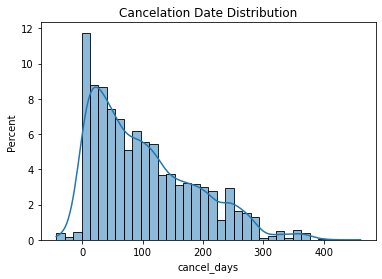

In [78]:
# Plot distribution of cancelation dates
sns.histplot(data=contracts_df, x="cancel_days", stat="percent", kde=True).set_title("Cancelation Date Distribution")

In [79]:
contracts_df["cancel_days"].mean()

101.66318436834977

The histogram shows a strongly right-skewed distribution, which points out that cancelation dates mostly occur within the first 100 days.
An hypothesis can be derived that these values should be expected due to probation periods as well as workers and companies being in several recruitment processes.

This needs to be further explored.

In [80]:
# Create new Dataframe with only Cancelled contracts for further exploration
cancellation_df = contracts_df.loc[~contracts_df.cancellation_date.isna(),:].copy()

cancellation_df_aux1 = cancellation_df[["company_name","company_id"]].groupby(by="company_name",as_index=False).count()
cancellation_df_aux2 = cancellation_df[["company_name","gross_wage_amount","fee_percentage","cancel_days"]].groupby(by="company_name",as_index=False).mean()
cancellation_company_df = pd.merge(left=cancellation_df_aux2, right=cancellation_df_aux1, how="inner", on="company_name")
cancellation_company_df.sort_values(by="company_id", ascending=False)

,company_name,gross_wage_amount,fee_percentage,cancel_days,company_id
104,Gonzalez PLC,1258.340241,5.116622,160.624665,746
246,Peterson-Wilson,1155.856121,5.225441,152.644836,397
226,Norman PLC,66.625148,4.799528,67.167213,305
241,Pearson Group,381.134564,5.169734,78.443983,241
58,Davies LLC,1258.34,0.42328,169.809524,189
...,...,...,...,...,...
194,"Martinez, Richardson and Jones",1202.88,7.0,18.000000,1
196,May Group,1684.93,10.0,91.000000,1
205,Meyer-Schultz,8.04,10.0,33.000000,1
209,"Miller, Fox and Thompson",8.64,10.0,2.000000,1


**Most companies frequent companies to cancel contracts have an average of 160 days.**

In [81]:
# Create new Dataframe with the job function grouped and their respective count percentage

# Add new column that will allow to count the frequencies of job functions
cancellation_df["job_count"] = 1 

# Group the date by job function and their respective running sum (count) 
cancellation_df_aux3 = cancellation_df[["job_function","job_count"]].groupby(by="job_function",as_index=False).sum()

# Group the date by job function and their respective running sum (count) 
cancellation_df_aux4 = cancellation_df[["job_function","gross_wage_amount","fee_percentage","cancel_days"]].groupby(by="job_function",as_index=False).mean()

# Add both grouped data and calculate the percentage of job funtions occurencies
cancellation_job_df = pd.merge(left=cancellation_df_aux4, right=cancellation_df_aux3, how="inner", on="job_function")
cancellation_job_df.sort_values(by="job_count", ascending=False).head(10)
total_job_counts = cancellation_job_df["job_count"].sum()
cancellation_job_df["job_count"] = cancellation_job_df["job_count"] / total_job_counts

In [82]:
# Visualize the highest frequencies according to job function
cancellation_job_df.sort_values(by="job_count", ascending=False).head(10)

,job_function,gross_wage_amount,fee_percentage,cancel_days,job_count
19,f1-guy,1151.63438,5.461518,121.893405,0.466435
15,drop-guy,148.352622,6.982343,68.551509,0.185916
32,restaurant-hotel-guy,800.190692,5.922962,71.100000,0.050300
25,minister,971.380927,5.888931,125.706564,0.050106
5,caller,96.092617,6.086641,84.007812,0.049526
37,support-guy,852.978756,4.263202,104.096774,0.041981
8,chef,252.596765,10.286412,82.370588,0.032888
4,buzz-guy,190.437714,6.511429,55.028571,0.020313
27,noise-guy,871.334167,7.681006,72.273810,0.016251
1,annoying-guy,363.268095,5.239683,56.603175,0.012188


**Additionally, most frequent jobs with cancelled contracts have an average of 121 days.**

Lastly, there might be a certain pattern regarding the cancelation days per date. This is further explored.

Text(0.5, 1.0, 'Monthly Evolution of Cancelation Days (Mean Absolute Value)')

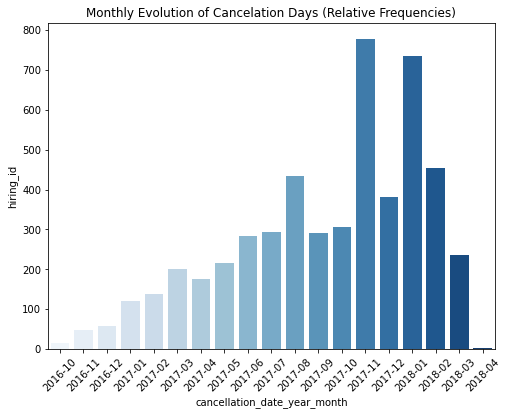

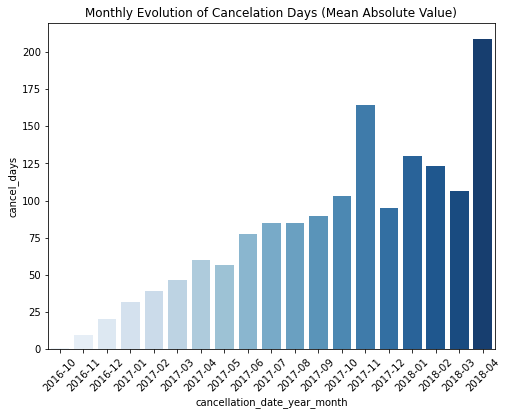

In [83]:
# Convert cancelation days to the desire year-month format
cancellation_df["cancellation_date_year_month"] = cancellation_df.cancellation_date.dt.strftime(date_format='%Y-%m')

plt.figure(figsize=(8, 6))
plt.xticks(rotation=45)
sns.barplot(data=cancellation_df[["cancellation_date_year_month","hiring_id"]]\
            .groupby(by="cancellation_date_year_month", as_index=False).count(),\
            x="cancellation_date_year_month", y="hiring_id", palette="Blues").set_title("Monthly Evolution of Cancelation Days (Relative Frequencies)")

plt.figure(figsize=(8, 6))
plt.xticks(rotation=45)
sns.barplot(data=cancellation_df[["cancellation_date_year_month","cancel_days"]]\
            .groupby(by="cancellation_date_year_month", as_index=False).mean(),\
            x="cancellation_date_year_month", y="cancel_days", palette="Blues").set_title("Monthly Evolution of Cancelation Days (Mean Absolute Value)")

Finally, the feature `cancel_days` is plotted vs target variable `total_gross` to check if patterns emerge.

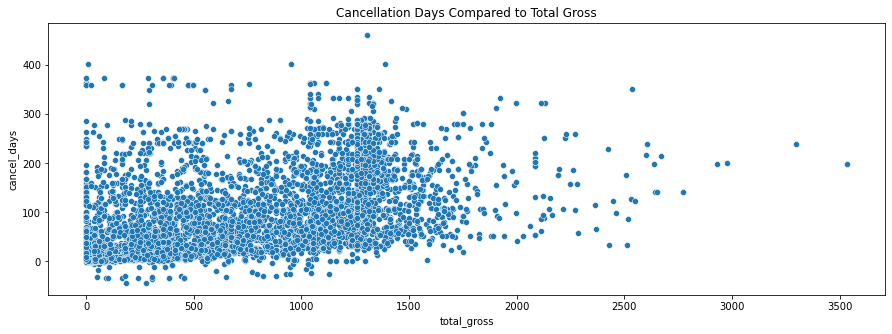

In [84]:
# Generate Scatterplot of Cancellation days vs Target Variable 
plt.figure(figsize=(15, 5))
sns.scatterplot(data=contracts_df.loc[contracts_df.total_gross <4000], y="cancel_days",x="total_gross").set_title("Cancellation Days Compared to Total Gross")
plt.show()

From the above graphical representation, we can infer that `Total_Gross` has a moderate to low positive correlation with `cancel_days`.

**This finding confirms that `cancel_days` should be included as an important Feature to predict Total Gross**.

**Patterns & Insights:**

There are 3 main findings:
- Cancelation days should be included as a predictor of the target variable.
- Cancellation days seem to occur within the first 160 days for companies and 121 days for candidates. 
- Cancellation days tend to occur during the last quarters of the year.

Evidence points out that cancelation days happen typically at the begining of work periods, during probation periods or whilst companies and workers might still be in interview processes.

## Final Observations

The previous analysis allowed to:
- Add new variables that increase the model's prediction power due tot heir relationships with the remaining variables `cancel_days` and `wp_days`.
- Establish that there are still a few relevant categorical features that are not included for simplicity purposes.

- Next, a final Dataframe is created to be used for the Model that filters for the identified relevant features only.
   1) **`Gross Wage Amount` that we have seen shares a close relationship with Total Gross** 
   2) **`Fee percentage`, that we have seen has a low negative relationship with Total Gross**
   3) **The generated `Cancel_Days` variable, since it has a negative relationship with Total Gross**
   4) **The generated `wp_days` variable, since it will determine the amount of Total Gross 
   5) **The generated  variable `wp_ends_on_quarter` since we have seen they tend to increse total gross in Q2 and Q3.

Finally, a Correlation Matrix highlights the summary of the EDA conducted.

In [85]:
# 1. Design Final Dataframe Variables for Model

# Set missing all values that do not have a cancellation date to 0
contracts_df.loc[contracts_df.cancellation_date.isnull(),["cancellation_date","cancel_days"]] = 0

# Select relevant features previously identified
model_df = contracts_df.loc[:,["total_gross","gross_wage_amount","fee_percentage","cancel_days","wp_days","wp_ends_on_quarter"]]

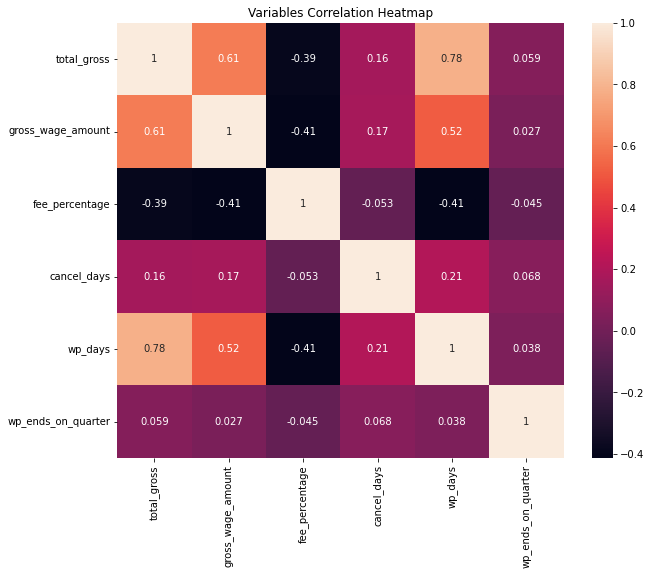

In [86]:
# heatmap with the correlations
correlation_df = model_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_df, annot=True).set_title("Variables Correlation Heatmap")
plt.show()

The Machine Learning model can now be constructed.

# Machine Learning Model: Forecast of Total Gross

## Model Decision Rational

The model chosen is a Linear Regression. This model is chosen since:

- Target Variable is a Continous Variable and this is a Supervised Experiment.
- It can serve as a good base initial model, before increasing complexity and moving to more complex models. 
- It is easy to explain and show graphically to evaluate the model performance.
- **The Dataset is small (up to 20.000 inputs)**.
- Few variables chosen to predict target variable. 

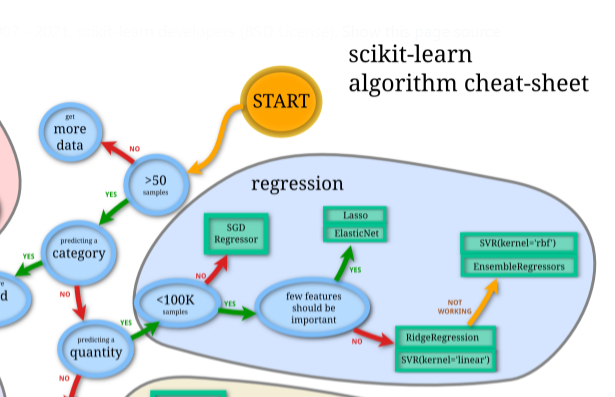

## Model Building

### Train, Test Split 

In order to generate the Model, the Dataframe Dataframe needs to be split into training and test sets. 

We have seen that the data dows not follow a Time Series pattern, `total_gross` is highly related to Work Period amounts.

Therefore we can use the whole sample data and generate a Split between Train and Test data using Scikit-Learn's predefined function.

**Note:** a few elements share common time patterns which have been included as variables e.g.: `wp_ends_on_quarter`.

In [87]:
X = model_df.drop("total_gross", axis=1)
y = model_df.total_gross

In [88]:
# Use SKLearn preprocessing split tool
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, train_size=0.30, random_state=0)

### Instantiate the Model, Fit Data and Make Predictions

In [89]:
# Instantiate chosen model
lr = linear_model.LinearRegression()

In [90]:
# Fit the train Data
lr.fit(X_train, y_train)

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


LinearRegression()

In [91]:
# Generate the prediction from the Test set
predictions = lr.predict(X_test)

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


## Model Evaluation

The model can now be evaluated.

By deriving the Coefficients of the model, we can see which variables are impacting the prediction of Total Gross.

Even though we cannot tell the order of magnitude for comparison, this can give good indication to further explore the Dataset and improve the model.

E.g.: by increasing 1 unit of `wp_days`, the `total_gross` will on average increase by 30 units. 

We can see that for this model `fee_percentages` and `cancel_days` similar relationships the the data previously analysed in the EDA.

In [92]:
# Generate new Dataframe with the Coefficients
coefs = pd.DataFrame()
coefs["Variables"] = X_train.columns
coefs["Coeff"] = lr.coef_
coefs

,Variables,Coeff
0,gross_wage_amount,0.232652
1,fee_percentage,-2.606107
2,cancel_days,-0.212920
3,wp_days,30.617708
4,wp_ends_on_quarter,12.263468


Next the `.score` function is used which allows to see the explained variability.

- The training set score is higher than the test score, which means the model is well constructed.
- However, the score are 0.67% which means that there is high bias in the predictions and the model can be further improved in order to reach a better fit (close t 100%).

In [93]:
rsquared_train = lr.score(X_train, y_train)
print(f"Coefficient of determination (R**2) on the training set: {rsquared_train:.2}")

Coefficient of determination (R**2) on the training set: 0.69


Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


In [94]:
rsquared_test = lr.score(X_test, y_test)
print(f"Coefficient of determination (R**2) on the test set: {rsquared_test:.2}")

Coefficient of determination (R**2) on the test set: 0.67


Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


The next step is to look at other error evaluation metrics:
- **Mean Squared Error:** On average the predicted Total Gross if wrong by $106.310$ (€/$). 
- **Mean Absolute Error:** On average, the model is obtained 231 erroneous units.

There is clear room for improvement.

In [95]:
mse = mean_squared_error(y_test, predictions)
f"Mean squared error (MSE) on the test set: {mse}"

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


'Mean squared error (MSE) on the test set: 106310.0564127575'

In [96]:
mae = mean_absolute_error(y_test, predictions)
f"Mean absolute error (MAE) on the test set: {mae}"

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


'Mean absolute error (MAE) on the test set: 231.62344132862765'

Next, we can plot check graphically the differences between predictions and real values.

In [97]:
real_vs_predicted = y_test.copy()
real_vs_predicted = pd.DataFrame(real_vs_predicted)
real_vs_predicted.columns = ["Real"]
real_vs_predicted["Predictions"] = predictions
real_vs_predicted["Error"] = real_vs_predicted.Real - real_vs_predicted.Predictions
# Need to convert all columns to Integer in order to plot results
real_vs_predicted = real_vs_predicted.apply(lambda x: x.astype("int"),axis=1)

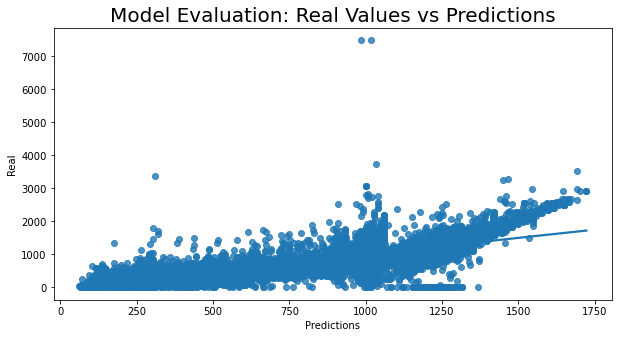

In [98]:
plt.figure(figsize=(10, 5))
sns.regplot(data=real_vs_predicted, x="Predictions", y="Real").set_title("Model Evaluation: Real Values vs Predictions", fontdict={"fontsize": 20})
plt.show()

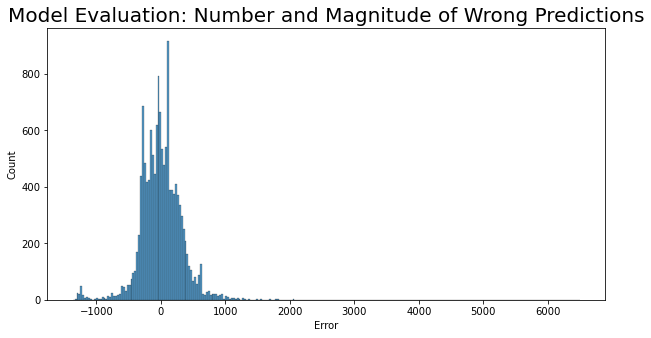

In [99]:
plt.figure(figsize=(10, 5))
sns.histplot(data=real_vs_predicted, x="Error").set_title("Model Evaluation: Number and Magnitude of Wrong Predictions", fontdict={"fontsize": 20})
plt.show()

## Further Improvements

As seen from the evaluation àrt, this model could be further improved and suffer from high-biais, the next steps could consist of:

- Ask for clarifications regarding the variable `work_period_unit` and `work_period_amount`. Since the main problem for wrong predictions relies on Actual Work Period vs Estimated Work Period, by understanding how current Work Period units and amount are calculated we could find relevant insights or create new variables that would increase the model accuracy.
- Use LabelEnconder and Dummy Variables to include Categorical variables that seemed to share relationships.
- Hyper-parameter Prunning to find optimal parameters.
- Add more features to the training and test sets can improve a high-bias estimator
- **Use a more sophisticated model**: - Try bagging regressor Models such as Random Forest.
- **Use fewer samples**: Though this will not improve the classification, nearly the same error can be attained with a smaller training sample